Importing all packages and modules in one cell

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Objectives: 

-Perform EDA on the PV data set obtained after data wrangling in stage 1.

-Explore relationships between the dependent variables and the independent variables. 

-Develop a rgression model that takes in the different independent variables to estimate an accurate value for the dependent variable.

In [2]:
!ls

Capstone2_Data_Wrangling.ipynb
Capstone2_Data_Wrangling_Main copy.ipynb
Capstone2_Data_Wrangling_rev1.ipynb
Capstone2_EDA_regression_analysis.ipynb
library
pv1_data_cleaned.csv


The data set cleaned in the previous stage is loaded here for Exploratory Data Analysis 

In [3]:
pv_clean = pd.read_csv('pv1_data_cleaned.csv', index_col = 0)
pv_clean.head()

/Users/srijagannathan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11,12,14,22,23,25,26,28,29,32,33,34,47,48,50,51,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


In [4]:
pv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635551 entries, 0 to 635550
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   installation_date                635551 non-null  object 
 1   system_size_DC                   635551 non-null  float64
 2   total_installed_price            635551 non-null  float64
 3   rebate_or_grant                  624634 non-null  float64
 4   customer_segment                 635551 non-null  object 
 5   expansion_system                 635551 non-null  int64  
 6   multiple_phase_system            635551 non-null  int64  
 7   new_construction                 140129 non-null  float64
 8   tracking                         519197 non-null  float64
 9   ground_mounted                   455608 non-null  float64
 10  zip_code                         621117 non-null  object 
 11  city                             612381 non-null  object 
 12  st

As we can see from above that a specific list of columns are imoprted as unknown data types. This happens due to the fact that pandas reads dataframes in chunks and when it runs into some chuncks where a column has both string and integer values it does not know what to do. Hence for the columns specified above we set them as string datatype. For columns that are supposed to have only integer values - if they contain string values, we would have received an error at the time of importing. Since that did not happen we will keep those feature columns as is.

We will reset the datatypes of the columns with mixed datatype.

In [5]:
column_list = [11,12,14,22,23,25,26,28,29,32,33,34,47,48,50,51,53,54]

In [6]:
for col in column_list:
    pv_clean.iloc[:, col] = pv_clean.iloc[:, col].astype(str)
        
    

In [7]:
pv_clean.head()

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,0,NaN,0.0,0.0,...,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


In [8]:
pv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635551 entries, 0 to 635550
Data columns (total 71 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   installation_date                635551 non-null  object 
 1   system_size_DC                   635551 non-null  float64
 2   total_installed_price            635551 non-null  float64
 3   rebate_or_grant                  624634 non-null  float64
 4   customer_segment                 635551 non-null  object 
 5   expansion_system                 635551 non-null  int64  
 6   multiple_phase_system            635551 non-null  int64  
 7   new_construction                 140129 non-null  float64
 8   tracking                         519197 non-null  float64
 9   ground_mounted                   455608 non-null  float64
 10  zip_code                         621117 non-null  object 
 11  city                             635551 non-null  object 
 12  st

 - Now that we have imported out data, we can now start with the fun stuff!  Exploratory data analysis. 
 - We start by giving a brief background on what are the factors that impact the price of a PV system. This step is basically relates to getting some basic domain knowledge. 
 - Note that these factors will be included in the dataset as columns will be our independent variables. 
 - Next we explore the relationships between the different features/ columns of the data set to get a better understanding if any of the columns have a strong co-relation between them and if there are any columns that are redundant and can be removed. 

## Brief Background

### Factors influencing the cost of a PV installation

Reference links - 
https://genrenew.com/factors-that-affect-the-cost-of-solar-panel-installation/

https://www.costofsolar.com/factors-influence-cost-residential-solar/



 - Roof angle and roof type - Alternatively the tilt angle and the azimuth angle of the roof - In solar panel installation, it is important to angle the solar panels so they can get maximum exposure to the sun. 
 
 - Tax incentives - Many city authorities and governments offer incentives for solar energy installations. In most cases, these incentives help reduce the total cost of installation. However, these incentives sometimes don’t apply in certain scenarios and the contractor is then forced to charge the extra cost on the homeowner.
 
 - Choice of solar panel - The type and model of solar panels used for the system is another factor in the cost of solar, although one that may be more up to the solar installer than the homeowner. Three different types of solar panels are available on the market: those made with monocrystalline solar cells or polycrystalline cells, and thin film solar. 
 
 - Power Inverter and module level power electronics - The brand and model of the power inverter unit, which converts the direct current (DC) electricity produced by the solar panels into the alternating current (AC) used inside the home, and which connects the solar system to the utility grid, also affects the total cost of a solar power installation.
 


## Exploratory Data Analysis

This section will focus on exploring the relationships between the different columns. 

 - We start by plotting some relationships between the installed price vs different features to explore any possible correlation. 
 
 Step 1 - Since we are interested in `$/W` we calculate this quantity based on the values given to us and add it to the data frame.

In [9]:
pv_clean['dollar_per_watt'] = pv_clean['total_installed_price'] / (pv_clean['system_size_DC'] * 1000)

In [10]:
pv_clean.shape

(635551, 72)

In [11]:
pv_clean.head()

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
0,29-Apr-2010 00:00:00,2.016,14558.0,0.0,RES,0,0,NaN,0.0,0.0,...,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN,7.221230
1,26-Apr-2010 00:00:00,3.360,26096.0,0.0,RES,0,0,NaN,0.0,0.0,...,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN,7.766667
2,20-Apr-2010 00:00:00,13.440,91139.0,0.0,RES,0,0,NaN,0.0,0.0,...,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN,6.781176
3,21-Apr-2010 00:00:00,5.520,40043.0,0.0,RES,0,0,NaN,0.0,0.0,...,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN,7.254167
4,22-Apr-2010 00:00:00,2.530,21497.0,0.0,RES,0,0,NaN,0.0,0.0,...,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN,8.496838


### Sorting based on  the installed date

Since our aim is to explore the variation in prices over time, it might be useful to first sort the data set based on the installation date. Doing so will give us an accurate variation in installation price variation.

In [12]:
pv_clean['installation_date'] = pd.to_datetime(pv_clean['installation_date'])

In [13]:
pv_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635551 entries, 0 to 635550
Data columns (total 72 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                635551 non-null  datetime64[ns]
 1   system_size_DC                   635551 non-null  float64       
 2   total_installed_price            635551 non-null  float64       
 3   rebate_or_grant                  624634 non-null  float64       
 4   customer_segment                 635551 non-null  object        
 5   expansion_system                 635551 non-null  int64         
 6   multiple_phase_system            635551 non-null  int64         
 7   new_construction                 140129 non-null  float64       
 8   tracking                         519197 non-null  float64       
 9   ground_mounted                   455608 non-null  float64       
 10  zip_code                         621117 non-

A quick look at the first 5 rows of the pv_clean data frame tells us that the columns are not sorted. Having converted the installation_date column to date time data type we can easily sort the data frame based on the installation data column. 

In [14]:
pv_clean = pv_clean.sort_values(by= 'installation_date')

In [15]:
pv_clean.head()

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
572491,1998-05-12,0.6000,17439.00,NaN,RES,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.065000
255709,1998-07-02,4.7280,30616.00,11820.0,RES,0,0,0.0,NaN,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,6.475465
226016,1998-08-14,0.9300,13629.00,2325.0,RES,0,0,0.0,NaN,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,14.654839
393638,1998-09-26,1.2192,12486.05,3048.0,RES,0,0,0.0,NaN,NaN,...,NaN,NaN,3.297,NaN,NaN,0.0,NaN,NaN,NaN,10.241183
99916,1998-10-09,3.4152,17841.15,8538.0,RES,0,0,0.0,NaN,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,1.063594,NaN,NaN,5.224043


In [16]:
pv_clean['year'] = pv_clean['installation_date'].dt.year

In [17]:
pv_clean.head()

,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,year
572491,1998-05-12,0.6000,17439.00,NaN,RES,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.065000,1998
255709,1998-07-02,4.7280,30616.00,11820.0,RES,0,0,0.0,NaN,NaN,...,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,6.475465,1998
226016,1998-08-14,0.9300,13629.00,2325.0,RES,0,0,0.0,NaN,NaN,...,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,14.654839,1998
393638,1998-09-26,1.2192,12486.05,3048.0,RES,0,0,0.0,NaN,NaN,...,NaN,3.297,NaN,NaN,0.0,NaN,NaN,NaN,10.241183,1998
99916,1998-10-09,3.4152,17841.15,8538.0,RES,0,0,0.0,NaN,NaN,...,NaN,3.211,NaN,NaN,0.0,1.063594,NaN,NaN,5.224043,1998


In [18]:
# moving the year column to the front for easy visdibility
Year = pv_clean['year']
pv_clean.drop(labels = 'year', axis =1, inplace = True)
pv_clean.insert(1, 'Year', Year)
pv_clean.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
572491,1998-05-12,1998,0.6000,17439.00,NaN,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.065000
255709,1998-07-02,1998,4.7280,30616.00,11820.0,RES,0,0,0.0,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,6.475465
226016,1998-08-14,1998,0.9300,13629.00,2325.0,RES,0,0,0.0,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,14.654839
393638,1998-09-26,1998,1.2192,12486.05,3048.0,RES,0,0,0.0,NaN,...,NaN,NaN,3.297,NaN,NaN,0.0,NaN,NaN,NaN,10.241183
99916,1998-10-09,1998,3.4152,17841.15,8538.0,RES,0,0,0.0,NaN,...,NaN,NaN,3.211,NaN,NaN,0.0,1.063594,NaN,NaN,5.224043


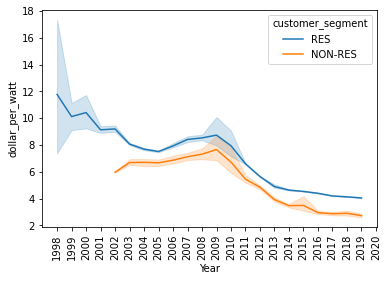

In [19]:
# making a line plot of price / W vs year
sns.lineplot(data = pv_clean, x = 'Year', y = 'dollar_per_watt', hue = 'customer_segment')
year = [i for i in range(1998, 2021)]
plt.xticks(year, rotation = 90);

So between 1998 to 2019 there has been a decrease in price for solar installation costs, which if you think about it is due to a significant improvement in this technology. 
A point to note that the plot shows the variation in price for residential vs non - residential installations. The data set shows price variation for non residential installations starting around 2001, 2002. Does this mean there were no non- residential instllations before that? Its hard to say that without any proof. Its most likely that this data set failed to capture data for non - residential instllations before 2002.

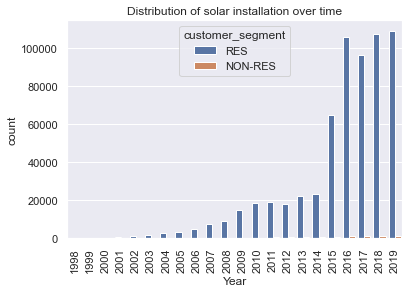

In [20]:
#Plot of installations by year -
sns.set_theme(style = 'darkgrid')
_ = sns.countplot(x = 'Year', hue = 'customer_segment',data = pv_clean)
plt.xticks(rotation = 90);
plt.title('Distribution of solar installation over time');

Over the years while the cost has gone down there has been an increase in the numebr of installations, especially for the year 2018 and 2019. There were marginal number of installations between the years 1998 to 2014. Also note that the plot above shows the count for residential vs non- residential systems. This given data set has a marginal count of non- residential systems.

In order to be able to estimate the cost more accurately, it will be relavant to consider recent data since there has been a huge increase in the number of installations especially for the years 2018- 2019. 

Moving forward we will consider a smaller data set for further EDA consisting of installations only for the year 2018 and 2019. Additionally we will consider only residential systems.

In [21]:
pv2 = pv_clean[((pv_clean['Year'] == 2018) | (pv_clean['Year'] == 2019)) & (pv_clean['customer_segment'] == 'RES')]
pv2.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
291283,2018-01-01,2018,10.3700,40500.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497
198315,2018-01-01,2018,7.4305,29355.73,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707
252580,2018-01-01,2018,12.6000,61150.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175
296521,2018-01-01,2018,5.2800,20900.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333
169345,2018-01-01,2018,6.8400,34139.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082


In [22]:
pv2 = pv2.reset_index(drop = True)
pv2.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
0,2018-01-01,2018,10.3700,40500.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497
1,2018-01-01,2018,7.4305,29355.73,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707
2,2018-01-01,2018,12.6000,61150.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175
3,2018-01-01,2018,5.2800,20900.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333
4,2018-01-01,2018,6.8400,34139.00,0.0,RES,0,0,NaN,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082


In [23]:
pv2['customer_segment'].unique()

array(['RES'], dtype=object)

In [24]:
pv2.drop(labels = 'customer_segment', axis = 1, inplace = True)
pv2.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
0,2018-01-01,2018,10.3700,40500.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497
1,2018-01-01,2018,7.4305,29355.73,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707
2,2018-01-01,2018,12.6000,61150.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175
3,2018-01-01,2018,5.2800,20900.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333
4,2018-01-01,2018,6.8400,34139.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082


###  2018 System size distribution

In [25]:
# exploring system size distributions for these two years
# for the year 2018

# segregate by customer segment into systems that are residential vs non- residential
df_2018 = pv2[(pv2['Year'] == 2018)][['system_size_DC']]
df_2018 = df_2018.reset_index(drop = True)
df_2018.head()



,system_size_DC
0,10.3700
1,7.4305
2,12.6000
3,5.2800
4,6.8400


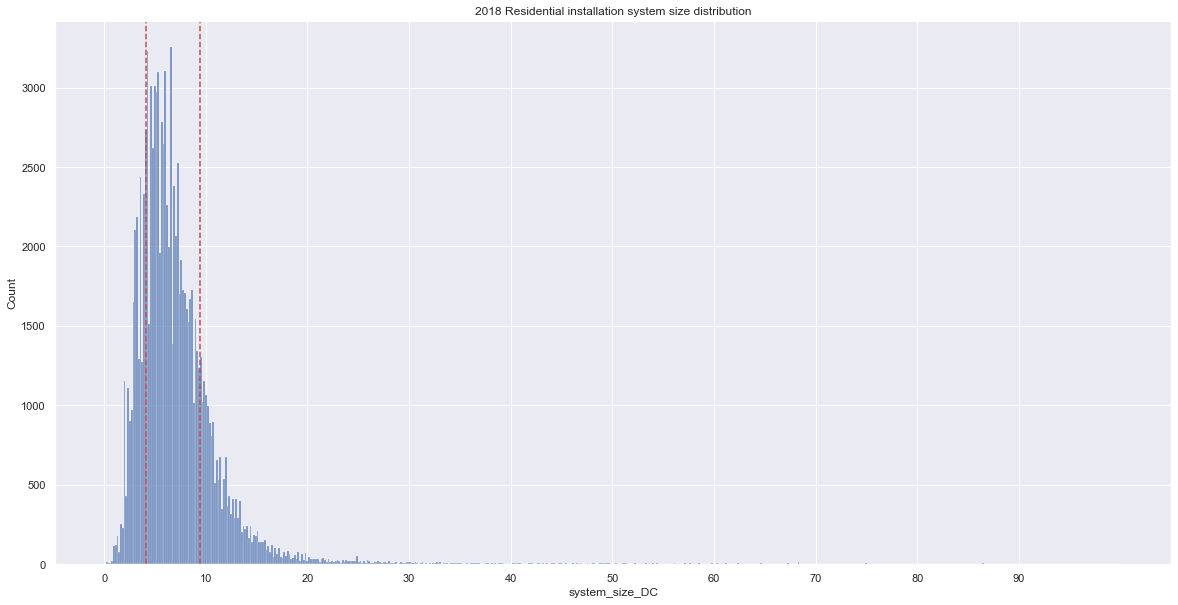

In [26]:
bin1 = [i for i in range(0, 100, 10)]
x_20 = df_2018['system_size_DC'].quantile(0.20)
x_80 = df_2018['system_size_DC'].quantile(0.80)
plt.figure(figsize = (20, 10))
sns.set_theme(style = 'darkgrid')
ax = sns.histplot(x = 'system_size_DC', data = df_2018)
plt.xticks(bin1);
ax.axvline(x = x_20, color = 'r', linestyle = '--');
ax.axvline(x = x_80, color = 'r', linestyle = '--');
plt.title('2018 Residential installation system size distribution');

For residential systems in 2018 we see a great number of systems with sizes between 0 to 20 kW

### 2019 system size distribution

In [27]:
df_2019 = pv2[(pv2['Year'] == 2019)][['system_size_DC']]
df_2019 = df_2019.reset_index(drop = True)
df_2019.head()

,system_size_DC
0,3.600
1,3.600
2,4.235
3,15.840
4,10.240


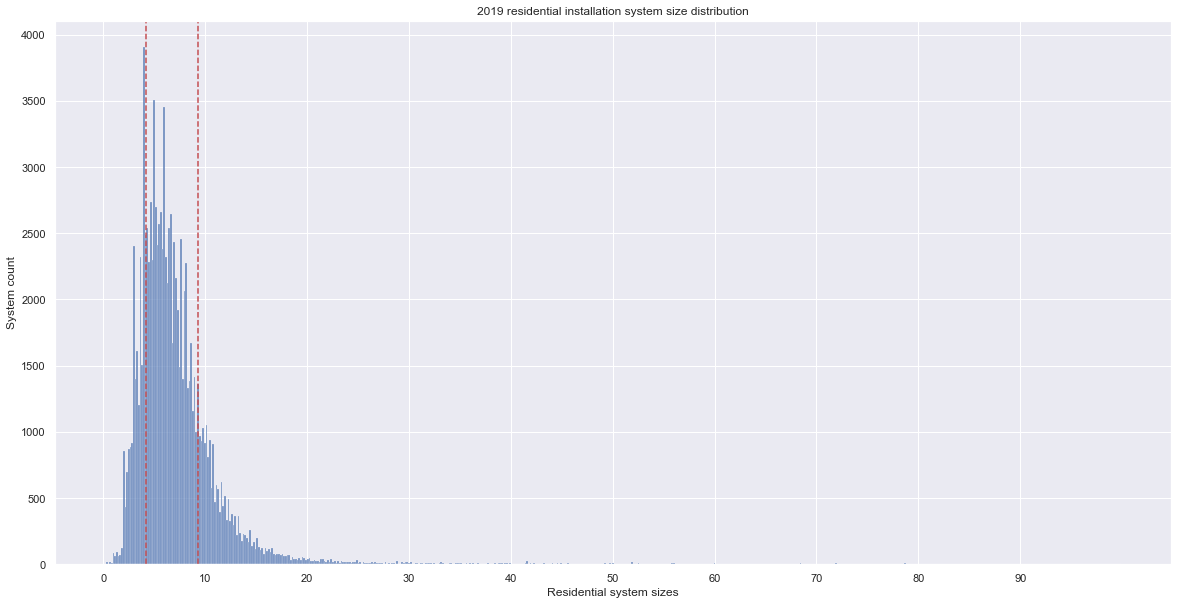

In [28]:
bin3 = [i for i in range(0, 100, 10)]
x_20 = df_2019['system_size_DC'].quantile(0.2)
x_80 = df_2019['system_size_DC'].quantile(0.8)
plt.figure(figsize = (20, 10))
sns.set_theme(style = 'darkgrid')
ax = sns.histplot(x ='system_size_DC', data = df_2019 )
plt.xticks(bin3)
ax.axvline(x = x_20, color = 'r', linestyle = '--')
ax.axvline(x = x_80, color = 'r', linestyle = '--')
_ = plt.xlabel('Residential system sizes')
_ = plt.ylabel('System count')
plt.title('2019 residential installation system size distribution');

<AxesSubplot:xlabel='Year', ylabel='system_size_DC'>

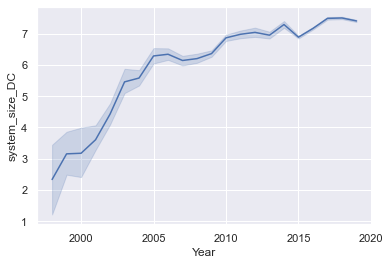

In [29]:
pv_res = pv_clean[pv_clean['customer_segment'] == 'RES']
sns.lineplot(x = 'Year', y = 'system_size_DC', data = pv_res)

While there has been a general decrease in price trend there there has been a general increase system sizes for residential installations. This is because over the years systems have become more efficient. This is becasue the modules have a better conversion efficiency. 

It might be a good idea to explore the technolgy used in the modules. 

A brief background before we begin exploring. 
The module technology fundamentally implies what kind of material and technology the PV panels are made of in order to produce electricity.
Currently the most popular ones in the market are - Mono-crystalline, Poly-crystalline and Thin film technology. Each kind of technology has its own pros and cons which we will not discuss here. Which kind of module to install in a system depends on factors like cost, type of property on which the panel is going to be installed, space constraints etc.

In [30]:
""" Note pv_res only includes rows data for residential installations over the years"""
pv_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629043 entries, 572491 to 7007
Data columns (total 73 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                629043 non-null  datetime64[ns]
 1   Year                             629043 non-null  int64         
 2   system_size_DC                   629043 non-null  float64       
 3   total_installed_price            629043 non-null  float64       
 4   rebate_or_grant                  618171 non-null  float64       
 5   customer_segment                 629043 non-null  object        
 6   expansion_system                 629043 non-null  int64         
 7   multiple_phase_system            629043 non-null  int64         
 8   new_construction                 139829 non-null  float64       
 9   tracking                         513795 non-null  float64       
 10  ground_mounted                   451081 n

In [31]:
pv_res['technology_module_1'].value_counts(dropna = False)

Mono           413748
Multi-c-Si     143951
NaN             48849
Poly            12879
redacted         7417
Thin Film        1526
<undefined>       468
a-Si              158
CIGS               45
CdTe                2
Name: technology_module_1, dtype: int64

In [32]:
pv_res['technology_module_2'].value_counts(dropna = False)

nan            605382
Mono             8822
redacted         7417
Multi-c-Si       4802
Thin Film        2268
Poly              314
a-Si               36
<undefined>         1
CIGS                1
Name: technology_module_2, dtype: int64

In [33]:
pv_res['technology_module_3'].value_counts(dropna = False)

nan         621626
redacted      7417
Name: technology_module_3, dtype: int64

In [34]:
pv_res['technology_module_3'].unique()

array(['nan', 'redacted'], dtype=object)

Notice that across the three columns we have a a value as 'redacted' and they all have the same count of 7417. If the data in these columns was redacted for confidentiality reasons then that data is no good to us and those rows can be removed. However we need to check if the value is set as 'redacted' across all the columns consistently for the same columns.

In [35]:
pv_redacted = pv_res[(pv_res['technology_module_1'] == 'redacted') & 
                     (pv_res['technology_module_2'] == 'redacted') &
                     (pv_res['technology_module_3'] == 'redacted')]
pv_redacted.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
619394,2000-08-01,2000,2.50,21050.0,12500.0,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.42
619425,2000-08-01,2000,2.64,23760.0,14520.0,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00
620247,2000-08-01,2000,4.40,39600.0,27720.0,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00
619367,2000-10-01,2000,2.31,20790.0,12705.0,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00
619265,2000-11-01,2000,1.84,12420.0,6532.0,RES,0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75


In [36]:
pv_redacted.shape

(7417, 73)

In [37]:
tech = ['technology_module_1', 'technology_module_2', 'technology_module_3']
for t in tech:
    print(pv_redacted[t].value_counts())
    

redacted    7417
Name: technology_module_1, dtype: int64
redacted    7417
Name: technology_module_2, dtype: int64
redacted    7417
Name: technology_module_3, dtype: int64


In [38]:
# dropping rows from the pv_res dataset that has technology_module as 'redacted'
pv_res = pv_res[pv_res['technology_module_1'] != 'redacted']

In [39]:
for t in tech:
    print(pv_res[t].value_counts())
    print('********************')

Mono           413748
Multi-c-Si     143951
Poly            12879
Thin Film        1526
<undefined>       468
a-Si              158
CIGS               45
CdTe                2
Name: technology_module_1, dtype: int64
********************
nan            605382
Mono             8822
Multi-c-Si       4802
Thin Film        2268
Poly              314
a-Si               36
<undefined>         1
CIGS                1
Name: technology_module_2, dtype: int64
********************
nan    621626
Name: technology_module_3, dtype: int64
********************


In [40]:
BIPV = ['BIPV_module_1', 'BIPV_module_2','BIPV_module_3']
for b in BIPV: 
    print(pv_res[b].value_counts())
    print('****************')

0.0    569545
nan     49600
1.0      2481
Name: BIPV_module_1, dtype: int64
****************
0.0    14310
1.0       66
Name: BIPV_module_2, dtype: int64
****************
0.0    4311
1.0       8
Name: BIPV_module_3, dtype: int64
****************


In [41]:
bifacial = ['bifacial_module_1', 'bifacial_module_2', 'bifacial_module_3']

for bi in bifacial:
    print(pv_res[bi].value_counts())
    print('**************')

0.0    582135
1.0       445
Name: bifacial_module_1, dtype: int64
**************
0.0    19508
1.0       13
Name: bifacial_module_2, dtype: int64
**************
0.0    4376
1.0       5
Name: bifacial_module_3, dtype: int64
**************


The type of technology, whether Monocrystalline, polycrystalline or if the module is Building Intrgrated Photovoltaic or if they are bifacial ultimately affect the efficiency. Hence we can consider taking the mean efficiencies of the modules mentioned as a metric for perfomance in our EDA and subsequently in the regression model.

From the technology standpoint we can compare these instllations based on the module efficiencies. Hence for each installation we calculate the average efficiency and save it as the overall module efficiency for the system. 

In [42]:
pv_res['Overall_Module_efficiency'] = pv_res.loc[:, 
                                                 ['efficiency_module_1',
                                                  'efficiency_module_2', 
                                                  'efficiency_module_3']].mean(axis = 1)

In [43]:
pv_res['Overall_Module_efficiency'].isna().sum()

100202

In [44]:
pv_res.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency
572491,1998-05-12,1998,0.6000,17439.00,NaN,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.065000,NaN
255709,1998-07-02,1998,4.7280,30616.00,11820.0,RES,0,0,0.0,NaN,...,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,6.475465,NaN
226016,1998-08-14,1998,0.9300,13629.00,2325.0,RES,0,0,0.0,NaN,...,NaN,3.211,NaN,NaN,0.0,NaN,NaN,NaN,14.654839,NaN
393638,1998-09-26,1998,1.2192,12486.05,3048.0,RES,0,0,0.0,NaN,...,NaN,3.297,NaN,NaN,0.0,NaN,NaN,NaN,10.241183,NaN
99916,1998-10-09,1998,3.4152,17841.15,8538.0,RES,0,0,0.0,NaN,...,NaN,3.211,NaN,NaN,0.0,1.063594,NaN,NaN,5.224043,NaN


In [45]:
pv_effncy_invalid = pv_res[(pv_res['efficiency_module_1'].isna()) & (pv_res['efficiency_module_2'].isna())
                          & (pv_res['efficiency_module_3'].isna())]

In [46]:
pv_effncy_invalid.shape

(100202, 74)

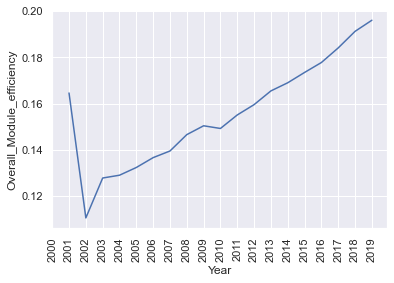

In [47]:
sns.lineplot(x = 'Year', y = 'Overall_Module_efficiency', data = pv_res)
plt.xticks([y for y in range(2000, 2020)], rotation = 90);

As we can see there has been an uptrend in the module efficiency over the years. This is in line with the increase in system sizes. As module grow more efficient, systems built over the same space are capabe of outputting more power.

Another set of factors that are making significant improvements in the PV installation industry are that of Module Level Power Electronics. 

Module-level power electronics are devices that can be incorporated into a solar PV system to improve its performance in certain conditions (especially where shade is present) and to achieve a number of other solar design benefits. MLPE includes microinverters and DC power optimizers. They perform some of the same functions as a string inverter or central inverter, but are typically coupled to just one (or a few) solar modules rather than many, and offer additional features.

(reference - https://www.aurorasolar.com/blog/module-level-power-electronics-mlpe-for-solar-design-a-primer/)

Lets have a look at he pv_res dataset to see what information can we obtain about the MLPE in the installations.

In [48]:
pv_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621626 entries, 572491 to 7007
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                621626 non-null  datetime64[ns]
 1   Year                             621626 non-null  int64         
 2   system_size_DC                   621626 non-null  float64       
 3   total_installed_price            621626 non-null  float64       
 4   rebate_or_grant                  610764 non-null  float64       
 5   customer_segment                 621626 non-null  object        
 6   expansion_system                 621626 non-null  int64         
 7   multiple_phase_system            621626 non-null  int64         
 8   new_construction                 139829 non-null  float64       
 9   tracking                         513795 non-null  float64       
 10  ground_mounted                   451081 n

We start by plotting histograms of DC optimizers and microinverters. However note that there are 3 columns for micro- inverters corresponding to one for each array oriantation. We create a column that stores if an installation has a micro-inverter or not by analysing the three columns and use that to create a count plot.

In [49]:
# MLPE related trends here...

# create a function that store a 1 or a 0 in a new columns 'micro-inverter' based on values in the 
# micro_inverter_1, _2, _3 columns - then use df.apply

def micro (row):
    val = 0
    if ((row['micro_inverter_1'] == np.nan) and 
       (row['micro_inverter_2'] == np.nan) and 
       (row['micro_inverter_3'] == np.nan)):
        val = np.nan
    elif ((row['micro_inverter_1'] == 1) or  
       (row['micro_inverter_2'] == 1) or 
       (row['micro_inverter_3'] == 1)):
        val = 1
    elif ((row['micro_inverter_1'] == 0) and 
       (row['micro_inverter_2'] == 0) and 
       (row['micro_inverter_3'] == 0)):
        val = 0
    
    return val


        
        
        


In [50]:
pv_res['micro_inverter'] = pv_res.apply(micro, axis = 1)

pv_res.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter
572491,1998-05-12,1998,0.6000,17439.00,NaN,RES,0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.065000,NaN,0
255709,1998-07-02,1998,4.7280,30616.00,11820.0,RES,0,0,0.0,NaN,...,3.211,NaN,NaN,0.0,NaN,NaN,NaN,6.475465,NaN,0
226016,1998-08-14,1998,0.9300,13629.00,2325.0,RES,0,0,0.0,NaN,...,3.211,NaN,NaN,0.0,NaN,NaN,NaN,14.654839,NaN,0
393638,1998-09-26,1998,1.2192,12486.05,3048.0,RES,0,0,0.0,NaN,...,3.297,NaN,NaN,0.0,NaN,NaN,NaN,10.241183,NaN,0
99916,1998-10-09,1998,3.4152,17841.15,8538.0,RES,0,0,0.0,NaN,...,3.211,NaN,NaN,0.0,1.063594,NaN,NaN,5.224043,NaN,0


In [51]:
pv_res.shape

(621626, 75)

In [52]:

pv_res['micro_inverter'].value_counts(dropna = False)

0    416096
1    205530
Name: micro_inverter, dtype: int64

In [53]:
pv_res['DC_optimizer'].value_counts(dropna = False)

0.0    397849
1.0    182533
NaN     41244
Name: DC_optimizer, dtype: int64

In [54]:
# creating a mini - dataframe only with year and micro_inverter
pv_micro = pv_res[pv_res['micro_inverter'] == 1][['Year', 'micro_inverter']]
pv_micro.head()

,Year,micro_inverter
398580,2006,1
90020,2008,1
182395,2008,1
450202,2008,1
51278,2008,1


In [55]:
pv_optimizer = pv_res[pv_res['DC_optimizer'] == 1][['Year', 'DC_optimizer']]
pv_optimizer.head()

,Year,DC_optimizer
459363,2008,1.0
262896,2010,1.0
121056,2010,1.0
246962,2010,1.0
436778,2010,1.0


Text(0.5, 1.0, 'Distribution of systems with DC optimizers')

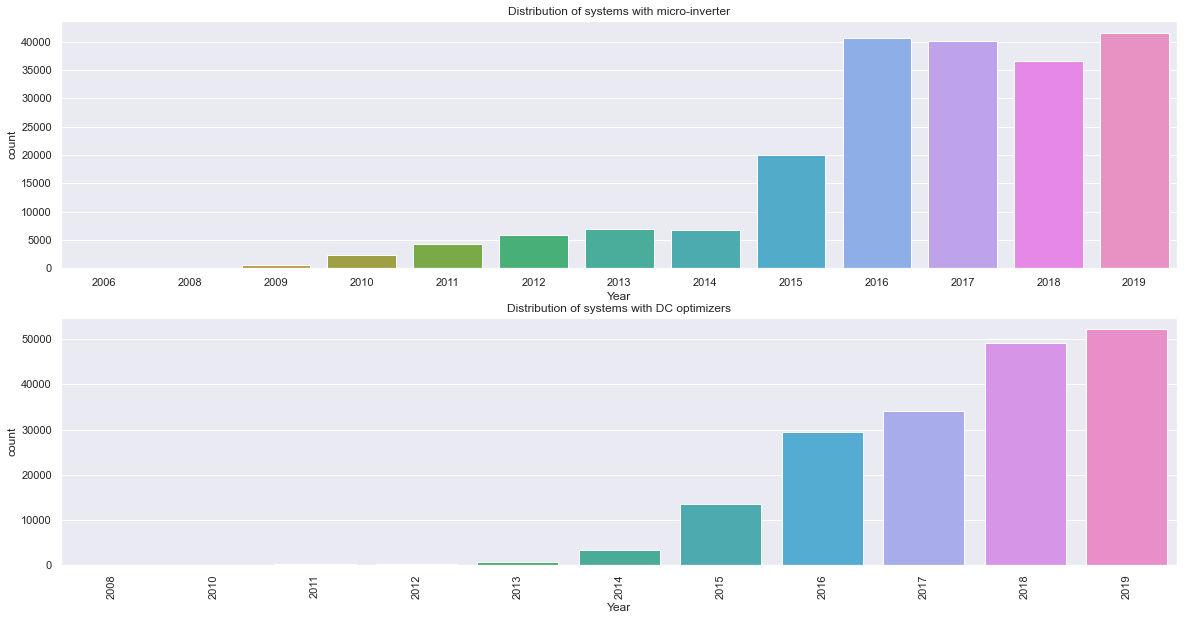

In [56]:
fig, ax = plt.subplots(2, 1, figsize = (20,10))
plt.xticks(rotation = 90);
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Year', data = pv_micro, ax = ax[0])
ax[0].set_title('Distribution of systems with micro-inverter');
sns.countplot(x = 'Year', data = pv_optimizer, ax = ax[1])
ax[1].set_title('Distribution of systems with DC optimizers')


As we can see over the years, adoption of Module Level Power Electronics has increased significantly.

In [57]:
# azimuth and tilt related trends here
azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']

for az in azimuth:
    print(pv_res[az].describe())
    print('**********************')


count    451106.000000
mean        188.746554
std          52.458074
min           0.000000
25%         170.000000
50%         180.000000
75%         220.000000
max         360.000000
Name: azimuth_1, dtype: float64
**********************
count    22023.000000
mean       191.928484
std         64.413709
min          0.000000
25%        155.000000
50%        180.000000
75%        249.000000
max        360.000000
Name: azimuth_2, dtype: float64
**********************
count    6259.000000
mean      185.818294
std        69.840579
min         0.000000
25%       140.000000
50%       180.000000
75%       244.000000
max       360.000000
Name: azimuth_3, dtype: float64
**********************


Analyze the orientation of the panels by creating a separate dataframe of the azimuth angles and categorizing them as North, South, East or West. 

North - 315 < $theta$< +45 deg

East -  45< $theta$ < 135 deg

South - 135 < $theta$ < 225 deg

West -  225 < $theta$ < 315 deg



In [58]:
pv_azimuth = pv_res[['azimuth_1', 'azimuth_2', 'azimuth_3']]
pv_azimuth.head()

,azimuth_1,azimuth_2,azimuth_3
572491,NaN,NaN,NaN
255709,NaN,NaN,NaN
226016,NaN,NaN,NaN
393638,NaN,NaN,NaN
99916,NaN,NaN,NaN


In [59]:
pv_azimuth.head()

,azimuth_1,azimuth_2,azimuth_3
572491,NaN,NaN,NaN
255709,NaN,NaN,NaN
226016,NaN,NaN,NaN
393638,NaN,NaN,NaN
99916,NaN,NaN,NaN


In [60]:
pv_azimuth.shape

(621626, 3)

In [61]:
def orientation_south(row):
    azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']
    valSouth = 0
    
    for az in azimuth:
        if (row[az]> 135 and row[az] <= 225):
            valSouth = 1
        
    return valSouth
            
def orientation_west(row):
    azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']
    valWest = 0
    
    for az in azimuth:
        if (row[az]> 225 and row[az] < 315): 
            valWest = 1 
    return valWest 

def orientation_north(row):
    azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']
    valNorth = 0
    
    for az in azimuth:           
        if (row[az]>= 0 and row[az] <= 45) or (row[az]>= 315 and row[az] <= 360):
            valNorth = 1
            
    return valNorth
            
def orientation_east(row):
    azimuth = ['azimuth_1', 'azimuth_2', 'azimuth_3']
    valEast = 0
    
    for az in azimuth:
        if (row[az]> 45 and row[az] <= 135):
            valEast = 1
    
    return valEast

        

In [62]:
pv_azimuth['SOUTH'] = pv_azimuth.apply(orientation_south, axis = 1)
pv_azimuth['WEST']  = pv_azimuth.apply(orientation_west, axis = 1)
pv_azimuth['NORTH'] = pv_azimuth.apply(orientation_north, axis = 1)
pv_azimuth['EAST'] = pv_azimuth.apply(orientation_east, axis = 1)

<ipython-input-62-d90ada035a56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_azimuth['SOUTH'] = pv_azimuth.apply(orientation_south, axis = 1)
<ipython-input-62-d90ada035a56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_azimuth['WEST']  = pv_azimuth.apply(orientation_west, axis = 1)
<ipython-input-62-d90ada035a56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [63]:
pv_azimuth['Year'] = pv_res['Year']

<ipython-input-63-0ea0e0c17790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pv_azimuth['Year'] = pv_res['Year']


In [64]:
pv_azimuth.head()

,azimuth_1,azimuth_2,azimuth_3,SOUTH,WEST,NORTH,EAST,Year
572491,NaN,NaN,NaN,0,0,0,0,1998
255709,NaN,NaN,NaN,0,0,0,0,1998
226016,NaN,NaN,NaN,0,0,0,0,1998
393638,NaN,NaN,NaN,0,0,0,0,1998
99916,NaN,NaN,NaN,0,0,0,0,1998


In [65]:
pv_south = pv_azimuth[pv_azimuth['SOUTH'] == 1][['SOUTH', 'Year']]
pv_west = pv_azimuth[pv_azimuth['WEST'] == 1][['WEST', 'Year']]
pv_north = pv_azimuth[pv_azimuth['NORTH'] == 1][['NORTH', 'Year']]
pv_east = pv_azimuth[pv_azimuth['EAST'] == 1][['EAST', 'Year']]

Text(0.5, 1.0, 'East facing systems')

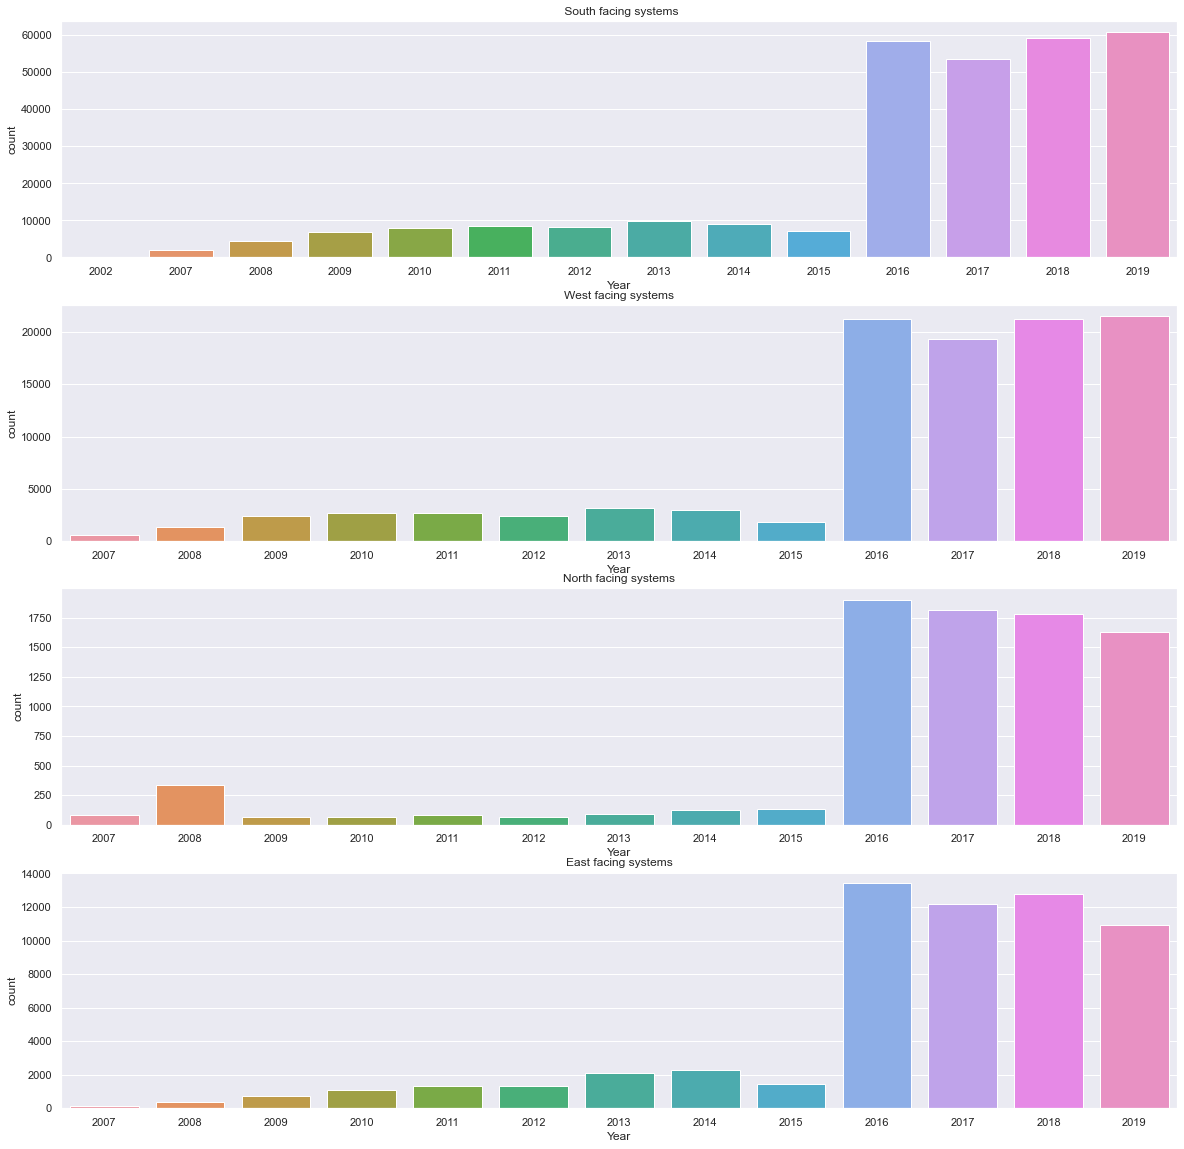

In [66]:
fig, ax = plt.subplots(4,1, figsize = (20,20))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Year', data = pv_south, ax = ax[0])
ax[0].set_title(' South facing systems')
sns.countplot(x = 'Year', data = pv_west, ax = ax[1])
ax[1].set_title('West facing systems')
sns.countplot(x = 'Year', data = pv_north, ax = ax[2])
ax[2].set_title('North facing systems')
sns.countplot(x = 'Year', data = pv_east, ax = ax[3])
ax[3].set_title('East facing systems')

While PV panel orientations are a key driver solar energy production, we can see a diverse distribution in the samples available. This could be because of an drop in panel prices over time that allow installations of PV panels in even sub optimal orientations. Additionally if more market penetration is to achieved, PV installers have to look beyond homes with ideal rooftop orientations.  

Reference - https://eta-publications.lbl.gov/sites/default/files


At this point lets briefly summarize the points we have focused on so far - 

- We saw a decresing price trend over the years for the `$/W` for PV installations. 
- We then saw a significant increase in residential system installations over the years and hence decided to focus on only those systems for the rest of the analysis. 
- While there has been a genereal decrease in pricing, there has been an increase in system size for residential systems over the years. We attributed that this could be due to the kind of PV panel used. Alternatively, over the years the module efficiencies have increased. This is evident from the plot of module efficiency for the last twenty years. 
- We subsequently analysed the adoption of Module Level Power Electronics in PV installations. We see a general uptrend there. 
- Moving on we saw the distribution of PV panel orientation and noticed a diverse distribution there. Given the diverse distribution, we can safely remove that as a contributing variable from the regression analysis. 
- In the next step we have to look into the impact of the state location on the PV installations. Rather than analyzing the installations in each state for the last twenty years( which can be overwhelming to look at), we analyze the installations in each state for the last two years. We look into states that have more than twenty installations in them.

In [67]:
pv2.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt
0,2018-01-01,2018,10.3700,40500.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497
1,2018-01-01,2018,7.4305,29355.73,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707
2,2018-01-01,2018,12.6000,61150.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175
3,2018-01-01,2018,5.2800,20900.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333
4,2018-01-01,2018,6.8400,34139.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082


In [68]:
pv_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621626 entries, 572491 to 7007
Data columns (total 75 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                621626 non-null  datetime64[ns]
 1   Year                             621626 non-null  int64         
 2   system_size_DC                   621626 non-null  float64       
 3   total_installed_price            621626 non-null  float64       
 4   rebate_or_grant                  610764 non-null  float64       
 5   customer_segment                 621626 non-null  object        
 6   expansion_system                 621626 non-null  int64         
 7   multiple_phase_system            621626 non-null  int64         
 8   new_construction                 139829 non-null  float64       
 9   tracking                         513795 non-null  float64       
 10  ground_mounted                   451081 n

In [69]:
pv3 = pv_res[(pv_res['Year'] == 2018) | (pv_res['Year'] == 2019)]

In [70]:
pv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216727 entries, 291283 to 7007
Data columns (total 75 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                216727 non-null  datetime64[ns]
 1   Year                             216727 non-null  int64         
 2   system_size_DC                   216727 non-null  float64       
 3   total_installed_price            216727 non-null  float64       
 4   rebate_or_grant                  215121 non-null  float64       
 5   customer_segment                 216727 non-null  object        
 6   expansion_system                 216727 non-null  int64         
 7   multiple_phase_system            216727 non-null  int64         
 8   new_construction                 16244 non-null   float64       
 9   tracking                         190702 non-null  float64       
 10  ground_mounted                   186804 n

In [71]:
pv3 = pv3.drop(labels = 'customer_segment', axis = 1)

In [72]:
pv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216727 entries, 291283 to 7007
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                216727 non-null  datetime64[ns]
 1   Year                             216727 non-null  int64         
 2   system_size_DC                   216727 non-null  float64       
 3   total_installed_price            216727 non-null  float64       
 4   rebate_or_grant                  215121 non-null  float64       
 5   expansion_system                 216727 non-null  int64         
 6   multiple_phase_system            216727 non-null  int64         
 7   new_construction                 16244 non-null   float64       
 8   tracking                         190702 non-null  float64       
 9   ground_mounted                   186804 non-null  float64       
 10  zip_code                         212190 n

In [73]:
# state based trends here

Text(0, 0.5, 'State wise distribution of installations')

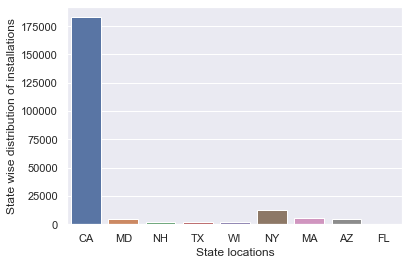

In [74]:
sns.set_theme(style = 'darkgrid')
_ = sns.countplot(x = 'state', data = pv3)
plt.xlabel('State locations')
plt.ylabel('State wise distribution of installations')

A significant number of installations are based out of California. If you think about it, given its location and warm sunny weather throughout the year, California makes a great place for PV installations.

Analysing pricing trend varitions: 

 - Count of installed prices
 - Pricing by system size
 - Pricing across states
 - Pricing by module efficiency
 - Pricing across installers
 - Pricing by inverter type
 - Pricing by mounting configuration
 - Pricing for residential instllations - retrofit vs new construction - for the state of California

In [75]:
pv3.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter
291283,2018-01-01,2018,10.3700,40500.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497,0.187117,0
198315,2018-01-01,2018,7.4305,29355.73,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707,0.165122,0
252580,2018-01-01,2018,12.6000,61150.00,0.0,0,0,NaN,0.0,0.0,...,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175,0.209170,0
296521,2018-01-01,2018,5.2800,20900.00,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333,0.197101,0
169345,2018-01-01,2018,6.8400,34139.00,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082,0.174472,0


In [76]:
pv3['dollar_per_watt'].describe()

count    216727.000000
mean          4.094283
std           2.119078
min           0.000023
25%           3.278689
50%           3.896104
75%           4.611675
max         470.156250
Name: dollar_per_watt, dtype: float64

Looking at the values for the 'dollar_per_watt' we notice that the general pricing lies in the range of $0 to $5. We see a mximum value of $470. Lets analyze this a little further as this can be an outlier. 


In [77]:
pv3[pv3['dollar_per_watt'] > 400]

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter
511855,2019-04-12,2019,20.0,9403125.0,NaN,0,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470.15625,NaN,0


In [78]:
pv3[(pv3['system_size_DC'] > 20) & (pv3['system_size_DC']< 21)]

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter
557728,2018-01-02,2018,20.70,95198.00,7245.0,0,0,NaN,NaN,NaN,...,0.315,NaN,NaN,0.0,1.095238,NaN,NaN,4.598937,0.211564,1
200391,2018-01-04,2018,20.30,41875.00,0.0,0,0,NaN,0.0,0.0,...,10.000,NaN,NaN,1.0,NaN,NaN,NaN,2.062808,0.172619,0
612280,2018-01-05,2018,20.40,55800.00,0.0,0,0,NaN,0.0,0.0,...,10.000,NaN,NaN,1.0,1.020000,NaN,NaN,2.735294,NaN,0
286201,2018-01-05,2018,20.30,82000.00,0.0,0,0,NaN,0.0,0.0,...,0.240,NaN,NaN,0.0,1.208333,NaN,NaN,4.039409,0.172619,1
302018,2018-01-08,2018,20.79,60000.00,0.0,0,0,NaN,0.0,0.0,...,0.290,NaN,NaN,0.0,1.086207,NaN,NaN,2.886003,0.167553,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571555,2019-12-18,2019,20.70,52361.00,7245.0,0,0,NaN,NaN,NaN,...,6.052,NaN,NaN,0.0,1.140119,NaN,NaN,2.529517,0.173019,0
238,2019-12-19,2019,20.54,50000.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.434275,0.196517,0
569775,2019-12-20,2019,20.54,54431.00,7189.0,0,0,NaN,NaN,NaN,...,0.550,NaN,NaN,0.0,1.436364,NaN,NaN,2.650000,0.196030,1
569131,2019-12-24,2019,20.77,59402.00,7269.0,0,0,NaN,NaN,NaN,...,0.240,NaN,NaN,0.0,1.395833,NaN,NaN,2.859990,0.203190,1


For a system size of 20kW we get a total price of over `$`9 million. This doesnt seem right. If we compare similar sized residential installations we see the price range to be much lower. Hence the value of $470 appears to be an outlier, which can be dropped.

In [79]:
pv3.drop(pv3[pv3['dollar_per_watt'] > 400].index, inplace = True)

In [80]:
pv3[pv3['dollar_per_watt'] > 400]

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter


In [81]:
pv3['dollar_per_watt'].describe(percentiles = [0.2, 0.25, 0.5, 0.75, 0.8])

count    216726.000000
mean          4.092133
std           1.867686
min           0.000023
20%           3.134197
25%           3.278689
50%           3.896102
75%           4.611659
80%           4.939643
max         315.000000
Name: dollar_per_watt, dtype: float64

The mean and median pricing is centered around `$3` - `$5`. 

In [82]:
pv_price = pv3[pv3['dollar_per_watt'] <= 10]

Text(0.5, 1.0, 'System distribution based on pricing')

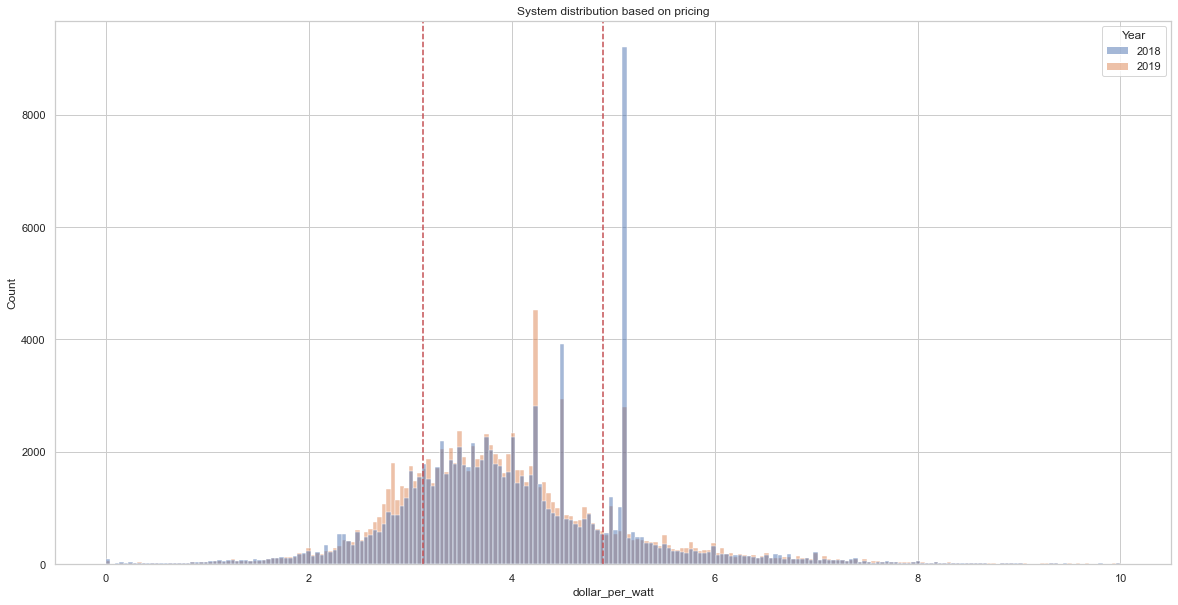

In [83]:
# count of installed prices
bin_price = [i for i in range(1, 10)]
x_20 = pv_price['dollar_per_watt'].quantile(0.2)
x_80 = pv_price['dollar_per_watt'].quantile(0.8)
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (20, 10))
ax = sns.histplot(pv_price, x = 'dollar_per_watt', hue = 'Year', palette = ["C0", "C1"])
ax.axvline(x_20, color = 'r', linestyle = '--')
ax.axvline(x_80, color = 'r', linestyle = '--')

plt.title('System distribution based on pricing')

In [84]:
df_2018 = pv3[pv3['Year'] == 2018][['system_size_DC', 'dollar_per_watt', 'state']]
df_2019 = pv3[pv3['Year'] == 2019][['system_size_DC', 'dollar_per_watt', 'state']]

In [85]:
df_2018.head()

,system_size_DC,dollar_per_watt,state
291283,10.3700,3.905497,CA
198315,7.4305,3.950707,CA
252580,12.6000,4.853175,CA
296521,5.2800,3.958333,CA
169345,6.8400,4.991082,CA


In [86]:
df_2019.head()

,system_size_DC,dollar_per_watt,state
29845,3.600,5.703814,CA
425187,3.600,3.933333,CA
35979,4.235,5.077922,CA
134770,15.840,3.030303,CA
469586,10.240,3.579102,AZ


In [87]:
df_2018 = df_2018.sort_values(by = 'system_size_DC')

In [88]:
df_2018['size_range'] = pd.cut(df_2018['system_size_DC'], bins = range(0,101, 10), 
                               labels = [f'{l} - {l + 10}' for l in range(0, 91, 10)])

In [89]:
df_2018.head()

,system_size_DC,dollar_per_watt,state,size_range
437007,0.1804,128.874723,CA,0 - 10
306950,0.2800,38.535714,CA,0 - 10
269845,0.2800,38.535714,CA,0 - 10
299515,0.2800,38.535714,CA,0 - 10
308216,0.2800,38.535714,CA,0 - 10


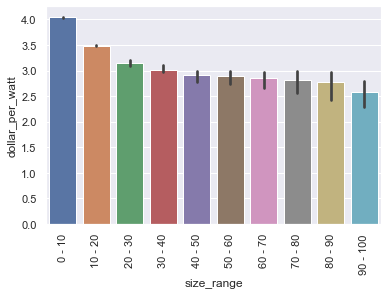

In [90]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'size_range', y = 'dollar_per_watt', data = df_2018, estimator = np.median)
plt.xticks(rotation = 90);

In [91]:
df_2019['size_range'] = pd.cut(df_2019['system_size_DC'], bins = range(0, 101,10), 
                               labels = [f'{l} - {l + 10}' for l in range(0,91,10)])
df_2019.head()

,system_size_DC,dollar_per_watt,state,size_range
29845,3.600,5.703814,CA,0 - 10
425187,3.600,3.933333,CA,0 - 10
35979,4.235,5.077922,CA,0 - 10
134770,15.840,3.030303,CA,10 - 20
469586,10.240,3.579102,AZ,10 - 20


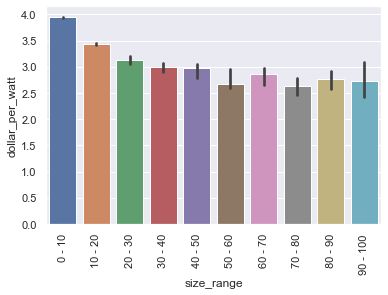

In [92]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'size_range', y = 'dollar_per_watt', data = df_2019, estimator = np.median)
plt.xticks(rotation = 90);

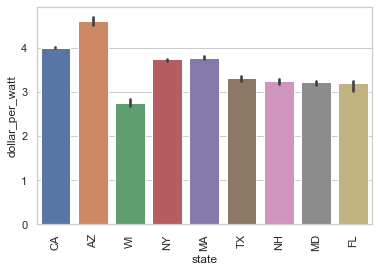

In [93]:
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'state', y = 'dollar_per_watt', data = df_2018, estimator = np.median)
plt.xticks(rotation = 90);

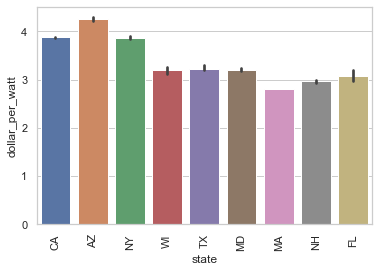

In [94]:
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'state', y = 'dollar_per_watt', data = df_2019, estimator = np.median)
plt.xticks(rotation = 90);

In [95]:
pv3.head()

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter
291283,2018-01-01,2018,10.3700,40500.00,0.0,0,0,NaN,0.0,0.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,3.905497,0.187117,0
198315,2018-01-01,2018,7.4305,29355.73,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,1.238417,NaN,NaN,3.950707,0.165122,0
252580,2018-01-01,2018,12.6000,61150.00,0.0,0,0,NaN,0.0,0.0,...,10.0,NaN,NaN,1.0,1.260000,NaN,NaN,4.853175,0.209170,0
296521,2018-01-01,2018,5.2800,20900.00,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,0.880000,NaN,NaN,3.958333,0.197101,0
169345,2018-01-01,2018,6.8400,34139.00,0.0,0,0,NaN,0.0,0.0,...,6.0,NaN,NaN,1.0,1.140000,NaN,NaN,4.991082,0.174472,0


In [96]:
pv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216726 entries, 291283 to 7007
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                216726 non-null  datetime64[ns]
 1   Year                             216726 non-null  int64         
 2   system_size_DC                   216726 non-null  float64       
 3   total_installed_price            216726 non-null  float64       
 4   rebate_or_grant                  215121 non-null  float64       
 5   expansion_system                 216726 non-null  int64         
 6   multiple_phase_system            216726 non-null  int64         
 7   new_construction                 16244 non-null   float64       
 8   tracking                         190702 non-null  float64       
 9   ground_mounted                   186804 non-null  float64       
 10  zip_code                         212190 n

In [97]:
pv3['Overall_Module_efficiency'].value_counts(dropna = False)

NaN         17609
0.194114    11064
0.205431     7877
0.197101     7785
0.220762     7322
            ...  
0.161025        1
0.178111        1
0.192747        1
0.155785        1
0.125484        1
Name: Overall_Module_efficiency, Length: 2665, dtype: int64

## Pricing variation based on module efficiency

In [98]:
pv3['Overall_Module_efficiency'] = pv3['Overall_Module_efficiency'] * 100

In [99]:
pv_effncy = pv3[~pv3['Overall_Module_efficiency'].isna()][['Overall_Module_efficiency', 'dollar_per_watt']]

In [100]:
pv_effncy['efficiency_range'] = pd.cut(pv3['Overall_Module_efficiency'], bins = range(9, 24, 2),
                                      labels = [f'{l}%- {(l) + 2}%' for l in range(9, 22, 2)])

In [101]:
pv_effncy['efficiency_range'].unique()

['17%- 19%', '15%- 17%', '19%- 21%', '21%- 23%', '13%- 15%', '9%- 11%', '11%- 13%']
Categories (7, object): ['9%- 11%' < '11%- 13%' < '13%- 15%' < '15%- 17%' < '17%- 19%' < '19%- 21%' < '21%- 23%']

In [102]:
pv_effncy.head()

,Overall_Module_efficiency,dollar_per_watt,efficiency_range
291283,18.711656,3.905497,17%- 19%
198315,16.512247,3.950707,15%- 17%
252580,20.917001,4.853175,19%- 21%
296521,19.710083,3.958333,19%- 21%
169345,17.447199,4.991082,17%- 19%


<AxesSubplot:xlabel='dollar_per_watt', ylabel='efficiency_range'>

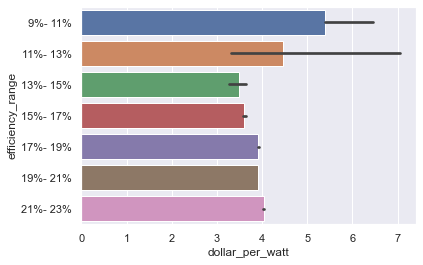

In [103]:
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'dollar_per_watt',y = 'efficiency_range' , data = pv_effncy, estimator = np.median)

Lower efficiency modules tend to have a higher dollar per watt - possibly because more modules are needed to get the same output than higher efficiency modules. This increases the system costs. On the other extreme modules with higher efficiency also tend to have a higher dollar per watt value. This could be because higher efficiency modules can be more expensive. 

## Pricing variation based on inverter type - DC optimizer vs Microinverter

In [104]:
# use pv_res to see pricing variation over the years based on inverter type used


In [105]:
pv_micro['dollar_per_watt'] = pv_res[pv_res['micro_inverter'] == 1]['dollar_per_watt']


In [106]:
pv_micro.head()

,Year,micro_inverter,dollar_per_watt
398580,2006,1,8.802963
90020,2008,1,7.467647
182395,2008,1,6.826364
450202,2008,1,8.673303
51278,2008,1,7.037255


In [107]:
pv_optimizer['dollar_per_watt'] = pv_res[pv_res['DC_optimizer'] == 1]['dollar_per_watt']

<AxesSubplot:xlabel='Year', ylabel='dollar_per_watt'>

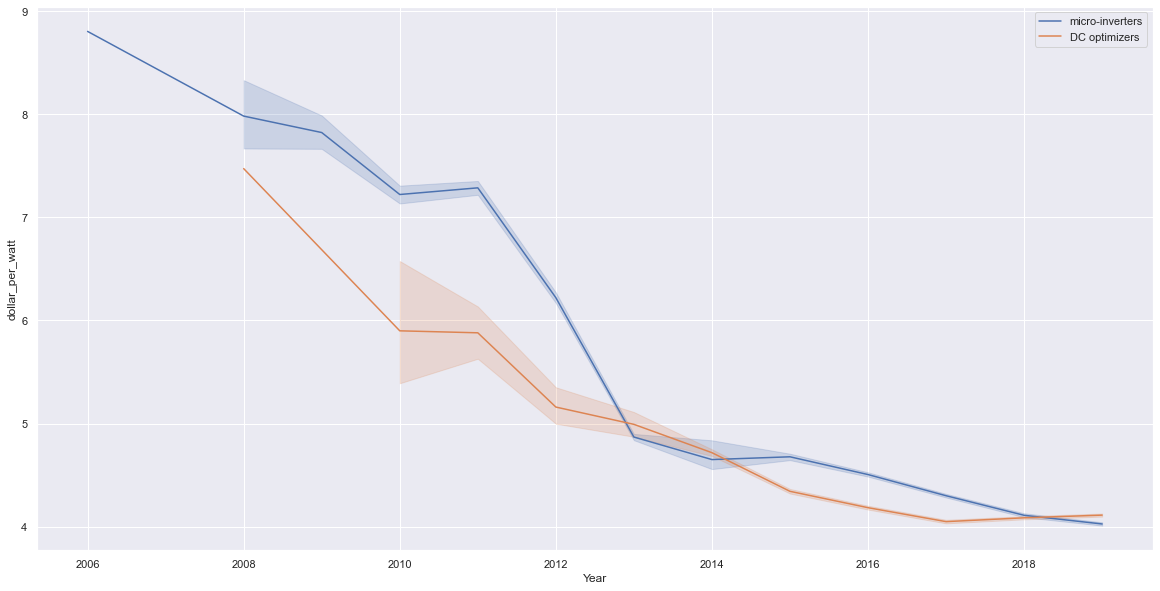

In [108]:
fig, ax = plt.subplots( 1, 1, figsize = (20,10))
sns.lineplot(x = 'Year', y = 'dollar_per_watt', data = pv_micro, ax = ax, label = 'micro-inverters')

sns.lineplot(x = 'Year', y = 'dollar_per_watt', data = pv_optimizer, ax = ax, label = 'DC optimizers')


Previous countplot showed us an increase the adoption of both micro-inverters and DC optimizers. A corresponding decrease in pricing implies that more the adoption of MLPE's lower the price. Based on the price variation above we can see that both DC optmizers and micro-inverters have a similar impact on the price. 
We can note however that the slope of price decrease is steeper for systems with micor-inverters vs DC optimizers implying that having a micro-inverter can help bring down the cost in the future. This is something that we can look into.

In [109]:
pv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216726 entries, 291283 to 7007
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                216726 non-null  datetime64[ns]
 1   Year                             216726 non-null  int64         
 2   system_size_DC                   216726 non-null  float64       
 3   total_installed_price            216726 non-null  float64       
 4   rebate_or_grant                  215121 non-null  float64       
 5   expansion_system                 216726 non-null  int64         
 6   multiple_phase_system            216726 non-null  int64         
 7   new_construction                 16244 non-null   float64       
 8   tracking                         190702 non-null  float64       
 9   ground_mounted                   186804 non-null  float64       
 10  zip_code                         212190 n

## Pricing variation by mounting config - ground mounted vs tracking

In [110]:
pv3['ground_mounted'].value_counts()

0.0    180662
1.0      6142
Name: ground_mounted, dtype: int64

In [111]:
pv3['tracking'].value_counts()

0.0    188962
1.0      1740
Name: tracking, dtype: int64

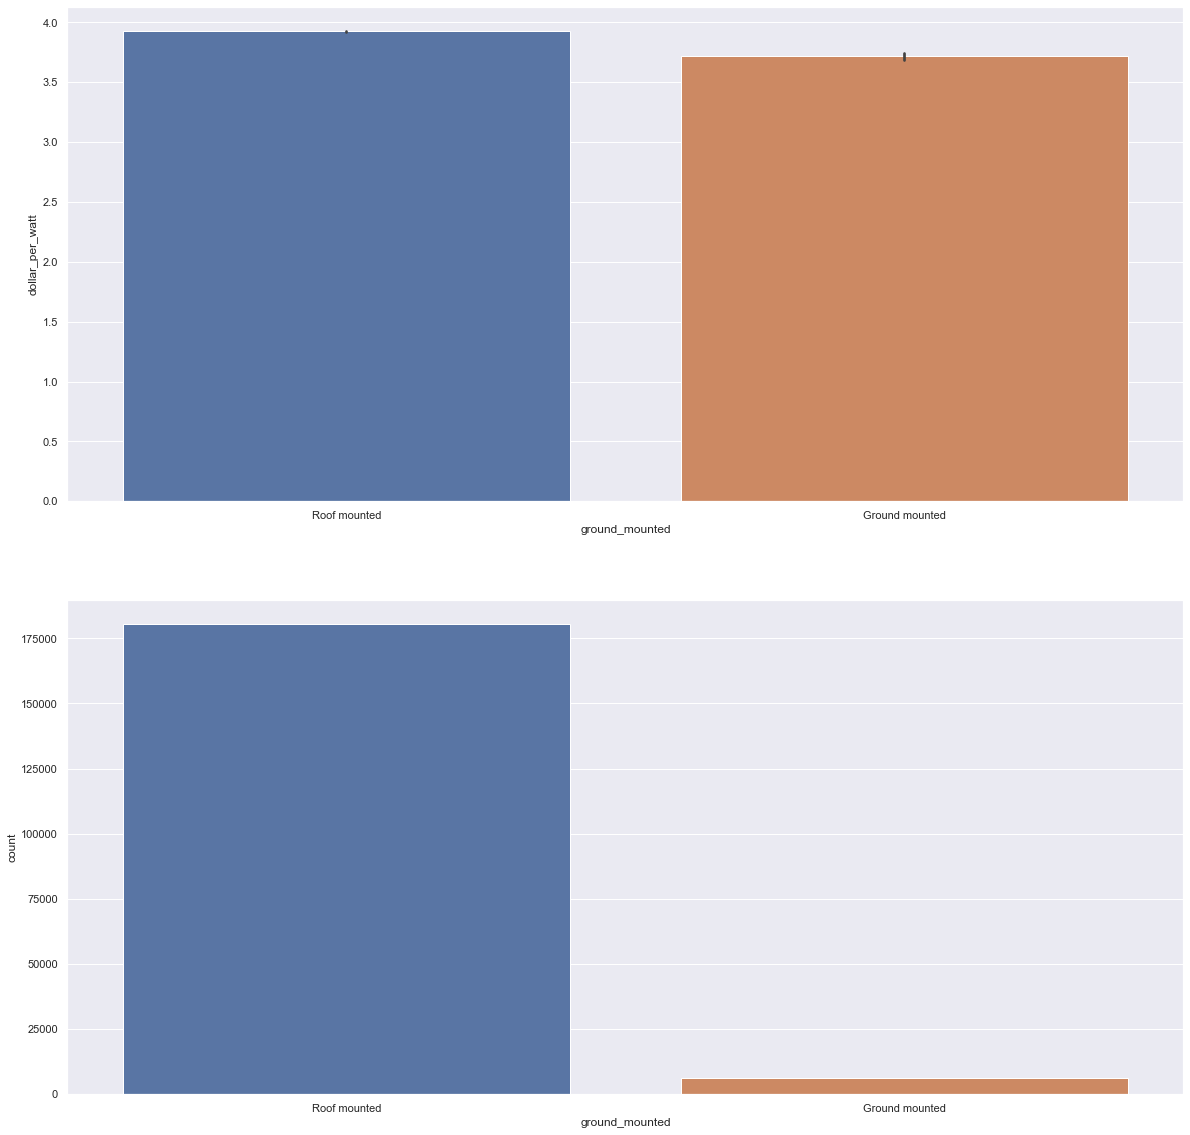

In [112]:
fig, ax = plt.subplots(2, 1, figsize = (20, 20))
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'ground_mounted', y= 'dollar_per_watt', data = pv3, estimator = np.median, ax = ax[0])
ax[0].set(xticklabels = ['Roof mounted', 'Ground mounted']);
sns.countplot(x = 'ground_mounted', data = pv3, ax = ax[1])
ax[1].set(xticklabels = ['Roof mounted', 'Ground mounted']);

Intuitively ground mounted systems might have higher upfront costs due to additional hardware, trenching and additional labor. However per the plot above they tend to have a lower cost, imlpying that higher initial costs may be offset by performance gains.

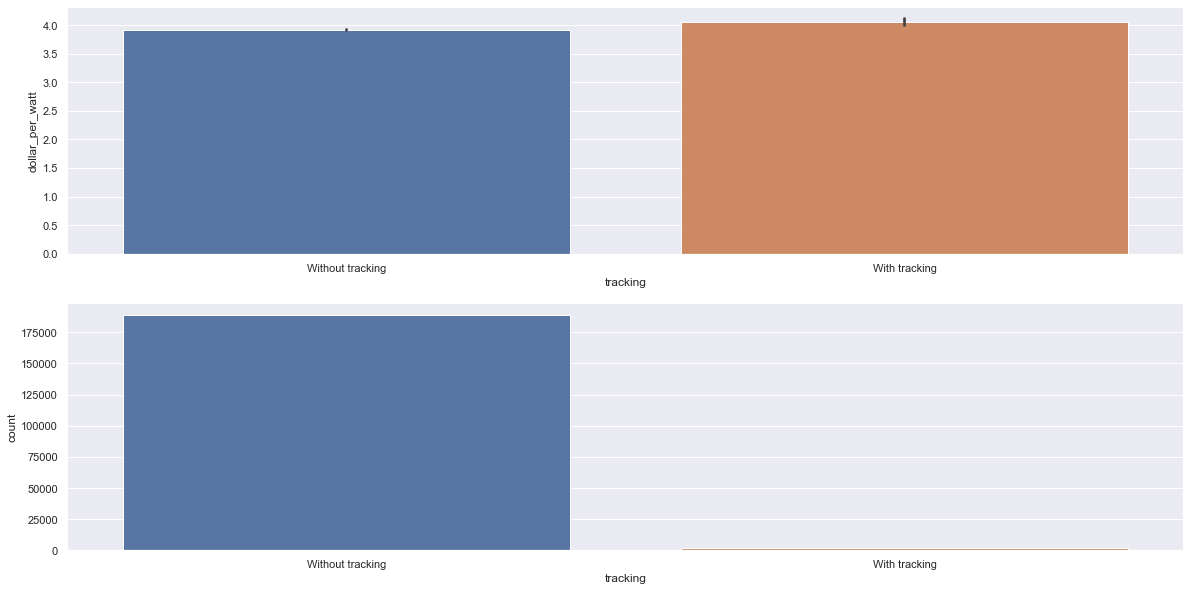

In [113]:
fig1, ax1 = plt.subplots(2, 1, figsize = (20, 10))
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'tracking', y = 'dollar_per_watt', data = pv3, estimator = np.median, ax = ax1[0])
ax1[0].set(xticklabels = ['Without tracking', 'With tracking']);
sns.countplot(x = 'tracking', data = pv3, ax = ax1[1])
ax1[1].set(xticklabels = ['Without tracking', 'With tracking'] );


As before - systems with tracking equipment tend to have higher costs, due to additional hardware costs.

As a note for the regression analyis, for rows that have a nan as the efficiency, we can replace it with the average efficiency based on the type of module.

For now, lets look at a lineplot of the variation of module efficiency over time.

## Pricing for retrofits vs new constructions

In [114]:
pv3['new_construction'].value_counts(dropna = False)

NaN    200482
0.0      9667
1.0      6577
Name: new_construction, dtype: int64

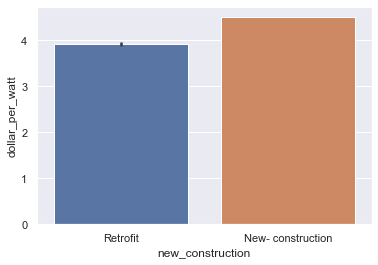

In [115]:
sns.set_theme(style = 'darkgrid')
ax = sns.barplot(x = 'new_construction', y = 'dollar_per_watt', data = pv3, estimator = np.median)
ax.set(xticklabels = ['Retrofit', 'New- construction']);

In [116]:
pv_new_construct = pv3[pv3['new_construction'] == 1][['Year', 
                                                      'installer_name', 
                                                      'Overall_Module_efficiency', 
                                                      'state',
                                                      'system_size_DC']]

In [117]:
pv_new_construct.head()

,Year,installer_name,Overall_Module_efficiency,state,system_size_DC
14045,2018,Sunpower Capital,20.543149,CA,3.015
133571,2018,Leonard Roofing,16.190918,CA,2.650
20910,2018,Sunpower Capital,20.543149,CA,4.020
75119,2018,Sunpower Capital,20.543149,CA,5.025
109684,2018,Sunpower Capital,20.543149,CA,3.015


In [118]:
pv_new_construct['Year'].value_counts()

2018    4339
2019    2238
Name: Year, dtype: int64

In [119]:
pv_new_construct['installer_name'].value_counts()

Sunpower Capital           4820
Leonard Roofing             611
Verengo                     318
Lighthouse Solar Austin     153
Petersen Dean               133
                           ... 
Permacity Solar               1
Soligent                      1
Anca Solar                    1
Sunrise Solar Roofing         1
Sunny Energy                  1
Name: installer_name, Length: 87, dtype: int64

In [120]:
pv_new_construct['state'].value_counts()

CA    6178
TX     307
WI      91
AZ       1
Name: state, dtype: int64

This is an interesting observation! Of the 6500 new constructs, nearly 5000 of them were done by one installer and nearly all of them are in the state of California.
This can explain a potential reason for costs for new constructs to be higher than retrofits. Having only one installer doesnt leave much room for competition. Likewise 

Solar installed in new construction can benefit from economies of both scale and scope,
potentially reducing its cost relative to retrofits on existing homes. Economies of scale occur
specifically in the case of large new housing developments, where equipment and services can be
procured in bulk, and system design and installation can be standardized and coordinated across
large numbers of homes in close proximity. Customer acquisition costs for these systems may also
be minimal, particularly if solar is installed as a standard feature on all homes in the developments.
Economies of scope, instead, occur when particular labor or materials costs can be shared between
PV installations and other elements of home construction, such as roofing and electrical work. 

In contrast, several other factors can lead to higher costs and prices for systems installed in new
construction. First, PV systems on new homes tend to be relatively small. Within California’s
NSHP program, for example, the median system size in 2018 was just 3.0 kW, compared to 6.1 kW
for retrofit systems in the state. New construction systems also disproportionately use premium
efficiency modules (83%, compared to 25% for retrofits) and microinverters (98%, compared to
41% for retrofits), which, as the previous sections have shown, tends to increase installed prices.

(Reference - https://eta-publications.lbl.gov/sites/default/files)


## Regression Analysis - model

Having viually analysed different relationsips between costs and the variaous fators / features affecting the cost of a PV installation, we can now move on take on a more analytical approach to explring the impact of the different features on our cost. 

We do this through a regression analysis. Here since we are exploring the impact of features on cost, the cost becomes our dependent variable. So we set the `dollar_per_watt` as our dependent variable. 
The rest of the columns, we modify them to a format more suitable for regression analysis. We select only those columns that have a significant impact in the cost. We call this the feature selection process. The regression model allows us to analyse the effect of indvidual PV price drivers on the cost.



From the given features we can select the following features to conduct the regression analysis: 
- kW
- efficiency of the modules
- DC optimizer ( dummy variable indicating if the system has a DC optimizer)
- Microinverter ( dummy variable indiciating if the system has a Microinverter)
- Ground Mounting ( dummy variable indicating if the system is ground mounted)
- New construction ( dummy variable indicating if they sytstem is new construction)
- Installer experience( For a given system i, installer experience is equal to the aggregate number of systems installed by the installer associated with system i as of the date that system i was installed.)


We use the pv3 data set that has entries for the year 2018 and 2019 since those two years have the most number of installations as well as they have the most recent information. We also assume them to be the most accurate. 

Some of the assumption we make for the regression analysis are : 
- All the installations are residential installations. 
- We only focus on systems are host owned and without any battery storage.
- Systems that are third party owned or self installed are not considered. 

In [122]:
# loading the pv3 dataset
pv3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216726 entries, 291283 to 7007
Data columns (total 74 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   installation_date                216726 non-null  datetime64[ns]
 1   Year                             216726 non-null  int64         
 2   system_size_DC                   216726 non-null  float64       
 3   total_installed_price            216726 non-null  float64       
 4   rebate_or_grant                  215121 non-null  float64       
 5   expansion_system                 216726 non-null  int64         
 6   multiple_phase_system            216726 non-null  int64         
 7   new_construction                 16244 non-null   float64       
 8   tracking                         190702 non-null  float64       
 9   ground_mounted                   186804 non-null  float64       
 10  zip_code                         212190 n

In [123]:
pv3['Year'].value_counts()

2019    109211
2018    107515
Name: Year, dtype: int64

In [128]:
pv_reg = pv3.iloc[:, [0, 1, 2, 7, 9, 10, 12, 14, 67, 71, 72, 73]]

In [129]:
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
291283,2018-01-01,2018,10.3700,NaN,0.0,95765,CA,Sunworks United,1.0,3.905497,18.711656,0
198315,2018-01-01,2018,7.4305,NaN,0.0,94534,CA,1st Light Energy,1.0,3.950707,16.512247,0
252580,2018-01-01,2018,12.6000,NaN,0.0,95746,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0
296521,2018-01-01,2018,5.2800,NaN,0.0,95677,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0
169345,2018-01-01,2018,6.8400,NaN,0.0,95993,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0


In [126]:
pv_reg['new_construction'].value_counts(dropna = False)

NaN    200482
0.0      9667
1.0      6577
Name: new_construction, dtype: int64

In [127]:
pv_reg.shape

(216726, 11)

In [130]:
pv_reg['Overall_Module_efficiency'].isna().sum()

17609

There are 17609 instalations that dont have any information about the efficiency of the module installed. For the values that are missing we can look at the type of modules installed and then impute the values in rows that have a module installed but a efficiency value missing. 

For this first we take a separate dataframe only with the type of modules, the efficiency and the overall module efficiency.

In [131]:
pv3['technology_module_1'].unique()

array(['Mono', 'Multi-c-Si', nan, 'Thin Film', 'Poly', 'CIGS',
       '<undefined>', 'a-Si'], dtype=object)

In [133]:
pv3['technology_module_1'].value_counts(dropna = False)

Mono           176262
Multi-c-Si      31286
NaN              8942
Thin Film         126
Poly               82
<undefined>        16
CIGS               11
a-Si                1
Name: technology_module_1, dtype: int64

In [134]:
pv3['technology_module_2'].value_counts(dropna = False)

nan           210469
Mono            3039
Thin Film       2181
Multi-c-Si       996
Poly              41
Name: technology_module_2, dtype: int64

In [135]:
pv3['technology_module_3'].value_counts(dropna = False)

nan    216726
Name: technology_module_3, dtype: int64

Module 3 has all of its data missing imlying that we dont have any information avaialable or that these installations dont have a third array of PV modules installed. For the sake of this project we assume that all of te installations dont have any third array installed.

Likewise we remove rows from pv3 that dont have a valid value for a valid value for technology_module_1 and technology_moule_2

In [137]:
pv3[(pv3['technology_module_1'].isna()) & (pv3['technology_module_2'].isna())]

,installation_date,Year,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,...,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,dollar_per_watt,Overall_Module_efficiency,micro_inverter


In [138]:
pv3['technology_module_1'].unique()

array(['Mono', 'Multi-c-Si', nan, 'Thin Film', 'Poly', 'CIGS',
       '<undefined>', 'a-Si'], dtype=object)

In [142]:
pv3['technology_module_2'].unique()

array(['nan', 'Thin Film', 'Mono', 'Multi-c-Si', 'Poly'], dtype=object)

In [143]:
pv3['technology_module_3'].unique()

array(['nan'], dtype=object)

In [149]:
pv3.loc[
        (pv3['technology_module_1'] != 'Mono') & 
        (pv3['technology_module_1'] != 'Poly')&
        (~pv3['technology_module_1'].isna()),'technology_module_1'] = 'Other'

In [150]:
pv3['technology_module_1'].unique()

array(['Mono', 'Other', nan, 'Poly'], dtype=object)

In [151]:
pv3.loc[(pv3['technology_module_2'] != 'Mono') &
        (pv3['technology_module_2'] != 'Poly') &
        (~pv3['technology_module_2'].isna()), 'technology_module_2'] = 'Other'

In [152]:
pv3['technology_module_2'].unique()

array(['Other', 'Poly'], dtype=object)

In [186]:
pv3[['technology_module_1','technology_module_2']] = pv_res[(pv_res['Year'] == 2018) | (pv_res['Year'] == 2019)][['technology_module_1', 'technology_module_2']]

In [187]:
pv3[['efficiency_module_1','efficiency_module_2']] = pv_res[(pv_res['Year'] == 2018) | (pv_res['Year'] == 2019)][['efficiency_module_1', 'efficiency_module_2']]

In [188]:
pv3.loc[
        (pv3['technology_module_1'] != 'Mono') & 
        (pv3['technology_module_1'] != 'Poly')&
        (~pv3['technology_module_1'].isna()),'technology_module_1'] = 'Other'

In [189]:
pv3.loc[(pv3['technology_module_2'] != 'Mono') &
        (pv3['technology_module_2'] != 'Poly') &
        (~pv3['technology_module_2'].isna()), 'technology_module_2'] = 'Other'

In [190]:
mono_efficiency = pv3[pv3['technology_module_1'] == 'Mono']['efficiency_module_1'].mean(skipna = True)

In [191]:
print(mono_efficiency)

0.19635202058822557


In [192]:
poly_efficiency = pv3[pv3['technology_module_1'] == 'Poly']['efficiency_module_1'].mean(skipna = True)

In [193]:
poly_efficiency

0.15643364194118176

In [194]:
other_efficiency = pv3[pv3['technology_module_1'] == 'Other']['efficiency_module_1'].mean(skipna = True)
other_efficiency

0.1796699456965505

In [195]:
# write a function to replace all the na values of efficiency if they have a valid valid value for the 
# technology of the module. Here we are replacing the na values with the mean
def replace_na_efficiency(df, array_number, array_efficiency, module_type, mean_efficiency):
    df.loc[(df[array_number] == module_type) &
          (df[array_efficiency].isna()), array_efficiency] = mean_efficiency
    

In [196]:
pv3['efficiency_module_1'].value_counts(dropna = False)

NaN         17835
0.194114    11106
0.205431     7893
0.197101     7852
0.220762     7373
            ...  
0.190504        1
0.160714        1
0.168092        1
0.144595        1
0.148256        1
Name: efficiency_module_1, Length: 1335, dtype: int64

In [197]:
replace_na_efficiency(pv3, 'technology_module_1', 'efficiency_module_1', 'Mono', mono_efficiency)

In [198]:
pv3['efficiency_module_1'].value_counts(dropna = False)

0.194114    11106
NaN          9257
0.196352     8578
0.205431     7893
0.197101     7852
            ...  
0.190504        1
0.160714        1
0.168092        1
0.144595        1
0.148256        1
Name: efficiency_module_1, Length: 1336, dtype: int64

In [199]:
# replacing values in technology_module_1
replace_na_efficiency(pv3, 'technology_module_1', 'efficiency_module_1', 'Poly', poly_efficiency) # for poly
replace_na_efficiency(pv3, 'technology_module_1', 'efficiency_module_1', 'Other', other_efficiency) # for other

In [200]:
# replacing values in technology_module_1
replace_na_efficiency(pv3, 'technology_module_2', 'efficiency_module_2', 'Mono', mono_efficiency) # for Mono
replace_na_efficiency(pv3, 'technology_module_1', 'efficiency_module_1', 'Poly', poly_efficiency) # for Mono
replace_na_efficiency(pv3, 'technology_module_1', 'efficiency_module_1', 'Other', other_efficiency) # for other

In [201]:
pv3['efficiency_module_2'].value_counts(dropna = False)

NaN         212735
0.194114       334
0.197101       213
0.196352       212
0.198655       161
             ...  
0.170234         1
0.126176         1
0.153314         1
0.164964         1
0.178928         1
Name: efficiency_module_2, Length: 462, dtype: int64

In [202]:
pv3['Overall_Module_efficiency'].value_counts(dropna = False)

NaN          17609
19.411445    11064
20.543149     7877
19.710083     7785
22.076219     7322
             ...  
20.177126        1
16.931366        1
17.604419        1
16.567560        1
18.133810        1
Name: Overall_Module_efficiency, Length: 2660, dtype: int64

In [204]:
pv3['Overall_Module_efficiency'] = pv3.loc[:, 
                                                 ['efficiency_module_1',
                                                  'efficiency_module_2', 
                                                  'efficiency_module_3']].mean(axis = 1, skipna = True)

In [205]:
pv3['Overall_Module_efficiency'].value_counts(dropna = False)

0.194114    11056
NaN          8840
0.196352     8459
0.205431     7874
0.197101     7777
            ...  
0.178111        1
0.192747        1
0.155785        1
0.188880        1
0.184642        1
Name: Overall_Module_efficiency, Length: 2790, dtype: int64

In [206]:
pv3['Overall_Module_efficiency'] = pv3['Overall_Module_efficiency'] * 100

In [207]:
pv3['Overall_Module_efficiency'].value_counts(dropna = False)

19.411445    11056
NaN           8840
19.635202     8459
20.543149     7874
19.710083     7777
             ...  
17.173727        1
18.255101        1
16.313669        1
16.702160        1
16.248243        1
Name: Overall_Module_efficiency, Length: 2785, dtype: int64

In [208]:
pv_reg = pv3.iloc[:, [0, 1, 2, 7, 9, 10, 12, 14, 67, 71, 72, 73]]

In [209]:
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
291283,2018-01-01,2018,10.3700,NaN,0.0,95765,CA,Sunworks United,1.0,3.905497,18.711656,0
198315,2018-01-01,2018,7.4305,NaN,0.0,94534,CA,1st Light Energy,1.0,3.950707,16.512247,0
252580,2018-01-01,2018,12.6000,NaN,0.0,95746,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0
296521,2018-01-01,2018,5.2800,NaN,0.0,95677,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0
169345,2018-01-01,2018,6.8400,NaN,0.0,95993,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0


In [210]:
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216726 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          216726 non-null  datetime64[ns]
 1   Year                       216726 non-null  int64         
 2   system_size_DC             216726 non-null  float64       
 3   new_construction           16244 non-null   float64       
 4   ground_mounted             186804 non-null  float64       
 5   zip_code                   212190 non-null  object        
 6   state                      216726 non-null  object        
 7   installer_name             216726 non-null  object        
 8   DC_optimizer               207579 non-null  float64       
 9   dollar_per_watt            216726 non-null  float64       
 10  Overall_Module_efficiency  207886 non-null  float64       
 11  micro_inverter             216726 non-null  int64

The goal is to make sure we have non invalid values for all the columns being used as a part of the regression analysis. 

We remove the rows with missing values for the nan values for overall module efficiency.

In [211]:
pv_reg = pv_reg[~pv_reg['Overall_Module_efficiency'].isna()]
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207886 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          207886 non-null  datetime64[ns]
 1   Year                       207886 non-null  int64         
 2   system_size_DC             207886 non-null  float64       
 3   new_construction           15126 non-null   float64       
 4   ground_mounted             184866 non-null  float64       
 5   zip_code                   207885 non-null  object        
 6   state                      207886 non-null  object        
 7   installer_name             207886 non-null  object        
 8   DC_optimizer               206000 non-null  float64       
 9   dollar_per_watt            207886 non-null  float64       
 10  Overall_Module_efficiency  207886 non-null  float64       
 11  micro_inverter             207886 non-null  int64

In [212]:
pv_reg[pv_reg['zip_code'].isna()]

,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
492011,2018-11-20,2018,6.4,0.0,NaN,NaN,CA,Amzntruction,0.0,5.585938,19.753086,1


For the given system we drop this row with an invalid value of zipcode

In [213]:
pv_reg = pv_reg[~pv_reg['zip_code'].isna()]
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207885 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          207885 non-null  datetime64[ns]
 1   Year                       207885 non-null  int64         
 2   system_size_DC             207885 non-null  float64       
 3   new_construction           15125 non-null   float64       
 4   ground_mounted             184866 non-null  float64       
 5   zip_code                   207885 non-null  object        
 6   state                      207885 non-null  object        
 7   installer_name             207885 non-null  object        
 8   DC_optimizer               205999 non-null  float64       
 9   dollar_per_watt            207885 non-null  float64       
 10  Overall_Module_efficiency  207885 non-null  float64       
 11  micro_inverter             207885 non-null  int64

In [214]:
pv_reg['new_construction'].value_counts(dropna = False)

NaN    192760
0.0      8855
1.0      6270
Name: new_construction, dtype: int64

For installations that have an invalid value for new_construction it could be that the owner just put it as N/A as an alternative to the answer 'NO' or maybe they had way to ascertain for sure. For the sake of this project we will assume that installations that have an invalid value for new_construction we replace it with a 0. 

In [215]:
pv_reg.loc[pv_reg['new_construction'].isna(), 'new_construction'] = 0
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207885 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          207885 non-null  datetime64[ns]
 1   Year                       207885 non-null  int64         
 2   system_size_DC             207885 non-null  float64       
 3   new_construction           207885 non-null  float64       
 4   ground_mounted             184866 non-null  float64       
 5   zip_code                   207885 non-null  object        
 6   state                      207885 non-null  object        
 7   installer_name             207885 non-null  object        
 8   DC_optimizer               205999 non-null  float64       
 9   dollar_per_watt            207885 non-null  float64       
 10  Overall_Module_efficiency  207885 non-null  float64       
 11  micro_inverter             207885 non-null  int64

In [217]:
pv_reg['ground_mounted'].value_counts(dropna = False)

0.0    179037
NaN     23019
1.0      5829
Name: ground_mounted, dtype: int64

In [218]:
pv_reg = pv_reg[~pv_reg['ground_mounted'].isna()]

In [219]:
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184866 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          184866 non-null  datetime64[ns]
 1   Year                       184866 non-null  int64         
 2   system_size_DC             184866 non-null  float64       
 3   new_construction           184866 non-null  float64       
 4   ground_mounted             184866 non-null  float64       
 5   zip_code                   184866 non-null  object        
 6   state                      184866 non-null  object        
 7   installer_name             184866 non-null  object        
 8   DC_optimizer               184778 non-null  float64       
 9   dollar_per_watt            184866 non-null  float64       
 10  Overall_Module_efficiency  184866 non-null  float64       
 11  micro_inverter             184866 non-null  int64

In [220]:
pv_reg['DC_optimizer'].value_counts(dropna = False)

0.0    95861
1.0    88917
NaN       88
Name: DC_optimizer, dtype: int64

In [221]:
pv_reg = pv_reg[~pv_reg['DC_optimizer'].isna()]
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184778 entries, 291283 to 7007
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          184778 non-null  datetime64[ns]
 1   Year                       184778 non-null  int64         
 2   system_size_DC             184778 non-null  float64       
 3   new_construction           184778 non-null  float64       
 4   ground_mounted             184778 non-null  float64       
 5   zip_code                   184778 non-null  object        
 6   state                      184778 non-null  object        
 7   installer_name             184778 non-null  object        
 8   DC_optimizer               184778 non-null  float64       
 9   dollar_per_watt            184778 non-null  float64       
 10  Overall_Module_efficiency  184778 non-null  float64       
 11  micro_inverter             184778 non-null  int64

Installer experience - We use the installer names to calculate the installer experience- For a given system i, installer experience is equal to the aggregate number of systems installed by the installer associated with system i as of the date that system i was installed. 

In [223]:
pv_installer = pv_reg[['installation_date', 'installer_name']]

In [224]:
pv_installer.head()

,installation_date,installer_name
291283,2018-01-01,Sunworks United
198315,2018-01-01,1st Light Energy
252580,2018-01-01,S E Lnstructionrporation
296521,2018-01-01,Sierra Pacific Home &Mfort
169345,2018-01-01,Syntrol Plumbing Heating & Air


In [226]:
pv_reg = pv_reg.reset_index()
pv_reg.head()

,level_0,index,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
0,0,291283,2018-01-01,2018,10.3700,0.0,0.0,95765,CA,Sunworks United,1.0,3.905497,18.711656,0
1,1,198315,2018-01-01,2018,7.4305,0.0,0.0,94534,CA,1st Light Energy,1.0,3.950707,16.512247,0
2,2,252580,2018-01-01,2018,12.6000,0.0,0.0,95746,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0
3,3,296521,2018-01-01,2018,5.2800,0.0,0.0,95677,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0
4,4,169345,2018-01-01,2018,6.8400,0.0,0.0,95993,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0


In [227]:
pv_reg.drop(labels = ['level_0', 'index'], axis = 1, inplace = True)
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
0,2018-01-01,2018,10.3700,0.0,0.0,95765,CA,Sunworks United,1.0,3.905497,18.711656,0
1,2018-01-01,2018,7.4305,0.0,0.0,94534,CA,1st Light Energy,1.0,3.950707,16.512247,0
2,2018-01-01,2018,12.6000,0.0,0.0,95746,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0
3,2018-01-01,2018,5.2800,0.0,0.0,95677,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0
4,2018-01-01,2018,6.8400,0.0,0.0,95993,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0


In [228]:
pv_reg.sort_values(by = 'installation_date')
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,zip_code,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter
0,2018-01-01,2018,10.3700,0.0,0.0,95765,CA,Sunworks United,1.0,3.905497,18.711656,0
1,2018-01-01,2018,7.4305,0.0,0.0,94534,CA,1st Light Energy,1.0,3.950707,16.512247,0
2,2018-01-01,2018,12.6000,0.0,0.0,95746,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0
3,2018-01-01,2018,5.2800,0.0,0.0,95677,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0
4,2018-01-01,2018,6.8400,0.0,0.0,95993,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0


In [229]:
pv_installer = pv_reg[['installation_date', 'installer_name']]
pv_installer.head()

,installation_date,installer_name
0,2018-01-01,Sunworks United
1,2018-01-01,1st Light Energy
2,2018-01-01,S E Lnstructionrporation
3,2018-01-01,Sierra Pacific Home &Mfort
4,2018-01-01,Syntrol Plumbing Heating & Air


In [230]:
pv_installer.sample(10)

,installation_date,installer_name
10536,2018-02-21,Solar Savings Direct
92933,2019-01-08,Solar Optimum
178611,2019-12-11,Slingshot Power
43616,2018-06-29,Transworld Solar
53487,2018-08-09,Sunpower Capital
48423,2018-07-20,The Green Store
47612,2018-07-17,Green Day Power
91743,2019-01-02,Sunworks United
120326,2019-05-10,Mike Brown
183598,2019-12-27,Capital Remodel & Design


In [231]:
pv_installer.tail()

,installation_date,installer_name
184773,2019-12-31,Solarmax Renewable Energy Provider
184774,2019-12-31,G C Electric
184775,2019-12-31,Solcius
184776,2019-12-31,Kuubix Energy
184777,2019-12-31,Solcius


In [246]:
pv_sample = pv_installer.iloc[0:5,:]
pv_sample.head()

,installation_date,installer_name
0,2018-01-01,Sunworks United
1,2018-01-01,1st Light Energy
2,2018-01-01,S E Lnstructionrporation
3,2018-01-01,Sierra Pacific Home &Mfort
4,2018-01-01,Syntrol Plumbing Heating & Air


In [249]:
for i in range(len(pv_sample)):
    print(pv_sample.loc[i, 'installer_name'])

Sunworks United
1st Light Energy
S E Lnstructionrporation
Sierra Pacific Home &Mfort
Syntrol Plumbing Heating & Air


In [248]:
list1 = [ i for i in range(len(pv_sample))]
pv_sample.insert(loc = 2, column = 'new_col', value = list1)
pv_sample.head()


,installation_date,installer_name,new_col
0,2018-01-01,Sunworks United,0
1,2018-01-01,1st Light Energy,1
2,2018-01-01,S E Lnstructionrporation,2
3,2018-01-01,Sierra Pacific Home &Mfort,3
4,2018-01-01,Syntrol Plumbing Heating & Air,4


In [250]:
installer = {}
installer_exp = []

for inst in range(len(pv_installer)):
    installer_name = pv_installer.loc[inst, 'installer_name']
    if installer_name not in installer: 
        installer[installer_name] = 1
    else:
        installer[installer_name] += 1
    installer_exp.append(installer[installer_name])
    


In [251]:
pv_installer.insert(loc = 2, column = 'installer_experience', value = installer_exp)

In [252]:
pv_installer.head()

,installation_date,installer_name,installer_experience
0,2018-01-01,Sunworks United,1
1,2018-01-01,1st Light Energy,1
2,2018-01-01,S E Lnstructionrporation,1
3,2018-01-01,Sierra Pacific Home &Mfort,1
4,2018-01-01,Syntrol Plumbing Heating & Air,1


In [253]:
pv_installer['installer_experience'].value_counts()

1        3035
2        2114
3        1817
4        1618
5        1483
         ... 
13759       1
15806       1
11708       1
14065       1
10429       1
Name: installer_experience, Length: 17313, dtype: int64

In [254]:
pv_reg['installer_experience'] = pv_installer['installer_experience']
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184778 entries, 0 to 184777
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          184778 non-null  datetime64[ns]
 1   Year                       184778 non-null  int64         
 2   system_size_DC             184778 non-null  float64       
 3   new_construction           184778 non-null  float64       
 4   ground_mounted             184778 non-null  float64       
 5   zip_code                   184778 non-null  object        
 6   state                      184778 non-null  object        
 7   installer_name             184778 non-null  object        
 8   DC_optimizer               184778 non-null  float64       
 9   dollar_per_watt            184778 non-null  float64       
 10  Overall_Module_efficiency  184778 non-null  float64       
 11  micro_inverter             184778 non-null  int64   

In [256]:
pv_reg.drop(columns = 'zip_code', axis = 1, inplace = True)
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184778 entries, 0 to 184777
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          184778 non-null  datetime64[ns]
 1   Year                       184778 non-null  int64         
 2   system_size_DC             184778 non-null  float64       
 3   new_construction           184778 non-null  float64       
 4   ground_mounted             184778 non-null  float64       
 5   state                      184778 non-null  object        
 6   installer_name             184778 non-null  object        
 7   DC_optimizer               184778 non-null  float64       
 8   dollar_per_watt            184778 non-null  float64       
 9   Overall_Module_efficiency  184778 non-null  float64       
 10  micro_inverter             184778 non-null  int64         
 11  installer_experience       184778 non-null  int64   

In [258]:
pv_reg.corr(method = 'pearson')

,Year,system_size_DC,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience
Year,1.000000,-0.012126,-0.060250,-0.011788,0.024426,-0.026408,0.149561,0.037673,0.172516
system_size_DC,-0.012126,1.000000,-0.116105,0.205023,0.021892,-0.132470,-0.015295,-0.090969,-0.100079
new_construction,-0.060250,-0.116105,1.000000,-0.032453,-0.176849,0.006626,0.082334,0.226159,0.075028
ground_mounted,-0.011788,0.205023,-0.032453,1.000000,-0.008828,-0.007274,-0.071659,-0.013697,-0.078899
DC_optimizer,0.024426,0.021892,-0.176849,-0.008828,1.000000,-0.010473,-0.189359,-0.759753,-0.049934
dollar_per_watt,-0.026408,-0.132470,0.006626,-0.007274,-0.010473,1.000000,-0.025040,-0.024290,0.114899
Overall_Module_efficiency,0.149561,-0.015295,0.082334,-0.071659,-0.189359,-0.025040,1.000000,0.289453,0.022827
micro_inverter,0.037673,-0.090969,0.226159,-0.013697,-0.759753,-0.024290,0.289453,1.000000,-0.201879
installer_experience,0.172516,-0.100079,0.075028,-0.078899,-0.049934,0.114899,0.022827,-0.201879,1.000000


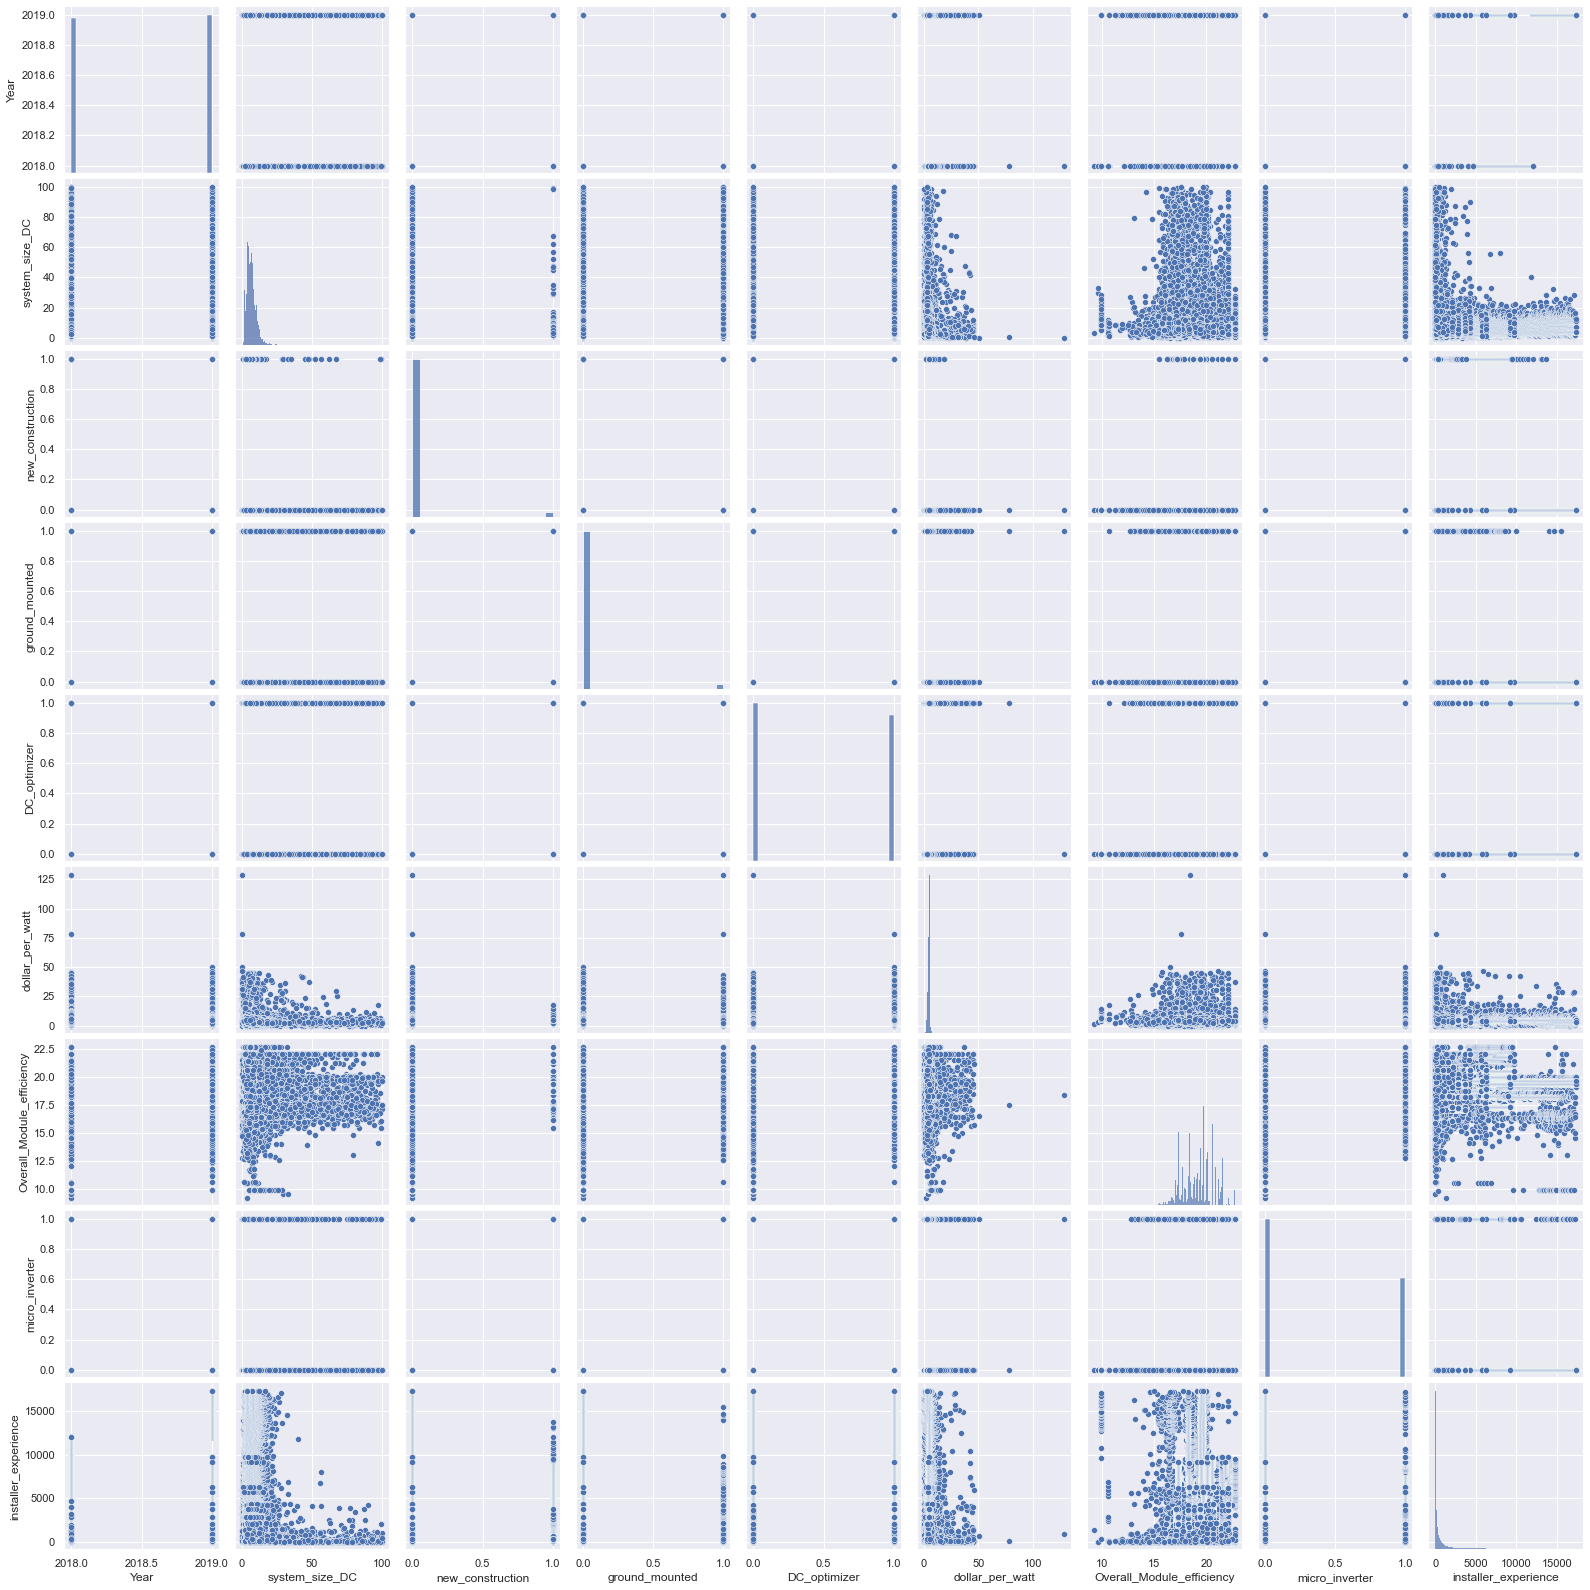

In [259]:
sns.pairplot(pv_reg)

In [260]:
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience
0,2018-01-01,2018,10.3700,0.0,0.0,CA,Sunworks United,1.0,3.905497,18.711656,0,1
1,2018-01-01,2018,7.4305,0.0,0.0,CA,1st Light Energy,1.0,3.950707,16.512247,0,1
2,2018-01-01,2018,12.6000,0.0,0.0,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0,1
3,2018-01-01,2018,5.2800,0.0,0.0,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0,1
4,2018-01-01,2018,6.8400,0.0,0.0,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0,1


<AxesSubplot:>

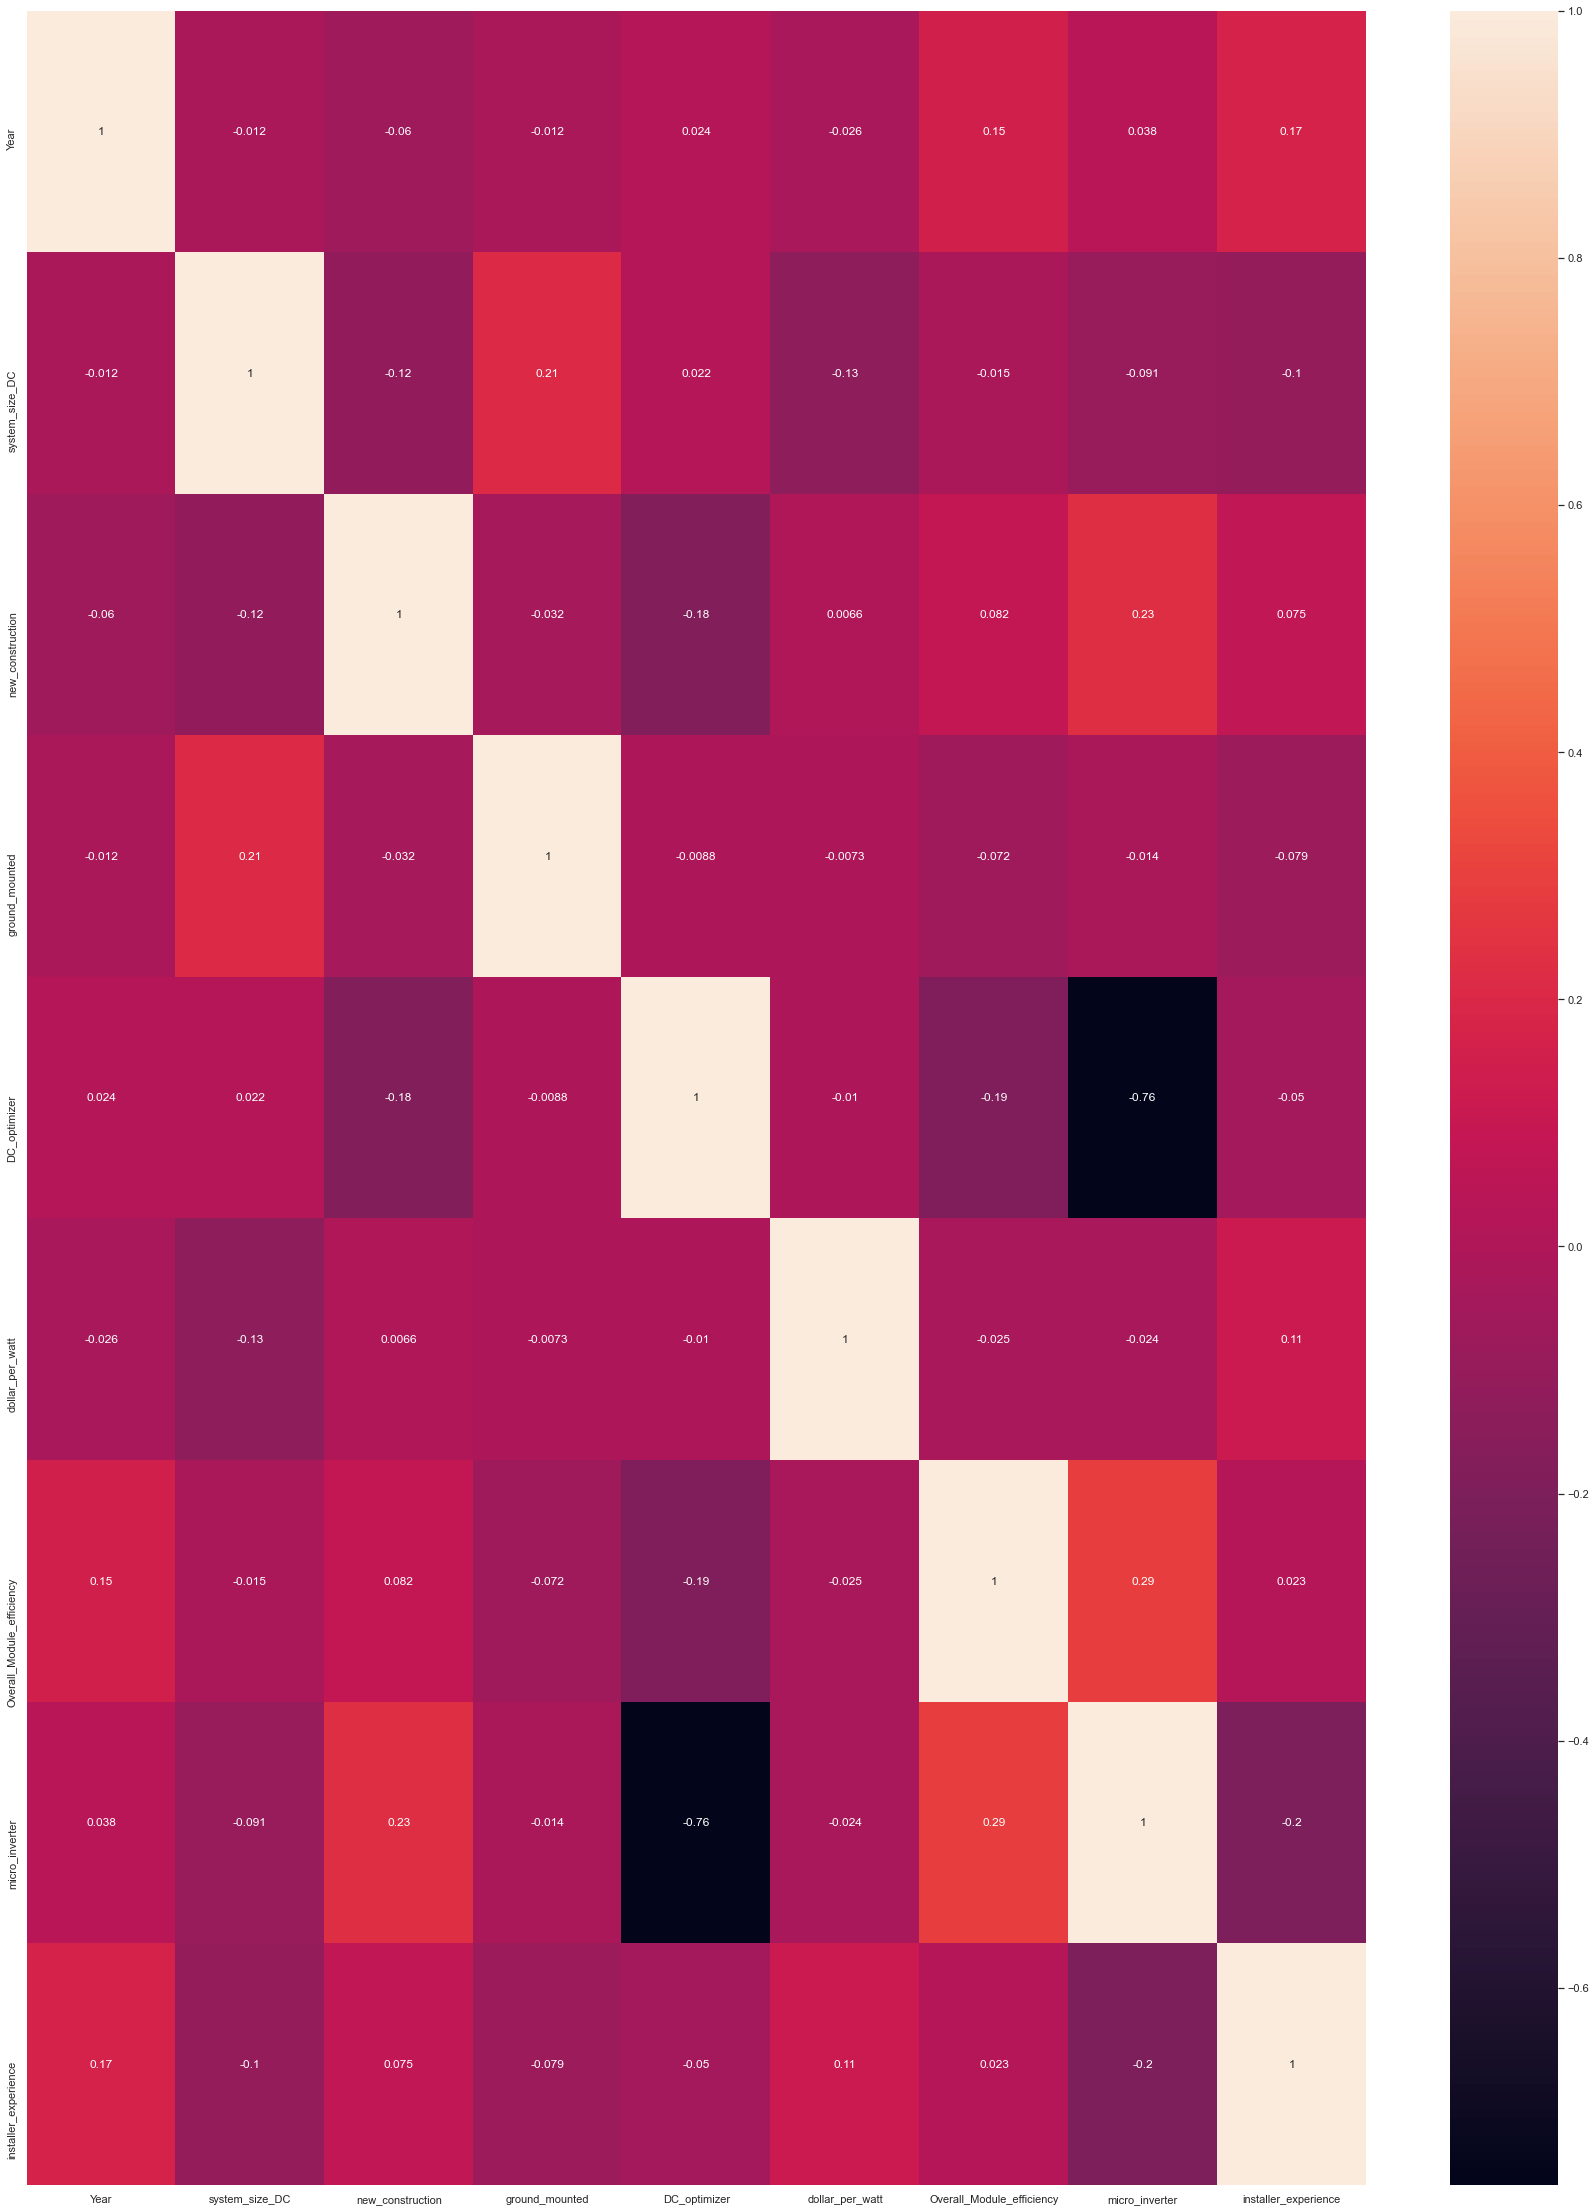

In [261]:
# create a heatmap to visualize the correlations
plt.figure(figsize = (30,40))

#creating the heatmap
sns.heatmap(pv_reg.corr(), annot = True)

Since a some of the columns are binary or categorical varaibles, we can calculate the spearmans rank correlation instead of the pearsons correlation coefficient. 

The Spearman's rank-order correlation is the nonparametric version of the Pearson product-moment correlation. Spearman's correlation coefficient, (ρ, also signified by rs) measures the strength and direction of association between two ranked variables.

reference - https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

In [262]:
pv_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184778 entries, 0 to 184777
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   installation_date          184778 non-null  datetime64[ns]
 1   Year                       184778 non-null  int64         
 2   system_size_DC             184778 non-null  float64       
 3   new_construction           184778 non-null  float64       
 4   ground_mounted             184778 non-null  float64       
 5   state                      184778 non-null  object        
 6   installer_name             184778 non-null  object        
 7   DC_optimizer               184778 non-null  float64       
 8   dollar_per_watt            184778 non-null  float64       
 9   Overall_Module_efficiency  184778 non-null  float64       
 10  micro_inverter             184778 non-null  int64         
 11  installer_experience       184778 non-null  int64   

We create a separate column as premium_module based on if the overall module efficiency is greater than 20%

In [266]:
pv_reg['Premium_Module']=np.where(pv_reg['Overall_Module_efficiency'] >=20, 1,0)
pv_reg.head()

,installation_date,Year,system_size_DC,new_construction,ground_mounted,state,installer_name,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module
0,2018-01-01,2018,10.3700,0.0,0.0,CA,Sunworks United,1.0,3.905497,18.711656,0,1,0
1,2018-01-01,2018,7.4305,0.0,0.0,CA,1st Light Energy,1.0,3.950707,16.512247,0,1,0
2,2018-01-01,2018,12.6000,0.0,0.0,CA,S E Lnstructionrporation,1.0,4.853175,20.917001,0,1,1
3,2018-01-01,2018,5.2800,0.0,0.0,CA,Sierra Pacific Home &Mfort,1.0,3.958333,19.710083,0,1,0
4,2018-01-01,2018,6.8400,0.0,0.0,CA,Syntrol Plumbing Heating & Air,1.0,4.991082,17.447199,0,1,0


In [268]:
pv_categorical = pv_reg[['new_construction', 'ground_mounted', 'state', 
                         'DC_optimizer', 'micro_inverter', 'installer_experience', 'Premium_Module']]
pv_categorical.head()

,new_construction,ground_mounted,state,DC_optimizer,micro_inverter,installer_experience,Premium_Module
0,0.0,0.0,CA,1.0,0,1,0
1,0.0,0.0,CA,1.0,0,1,0
2,0.0,0.0,CA,1.0,0,1,1
3,0.0,0.0,CA,1.0,0,1,0
4,0.0,0.0,CA,1.0,0,1,0


In [271]:
spearman_r = pv_categorical.corr(method = "spearman")
print(spearman_r)

                      new_construction  ground_mounted  DC_optimizer  \
new_construction              1.000000       -0.032453     -0.176849   
ground_mounted               -0.032453        1.000000     -0.008828   
DC_optimizer                 -0.176849       -0.008828      1.000000   
micro_inverter                0.226159       -0.013697     -0.759753   
installer_experience          0.139913       -0.128201      0.026569   
Premium_Module                0.179490       -0.045036     -0.225760   

                      micro_inverter  installer_experience  Premium_Module  
new_construction            0.226159              0.139913        0.179490  
ground_mounted             -0.013697             -0.128201       -0.045036  
DC_optimizer               -0.759753              0.026569       -0.225760  
micro_inverter              1.000000             -0.174217        0.348487  
installer_experience       -0.174217              1.000000        0.064123  
Premium_Module              0.348

<AxesSubplot:>

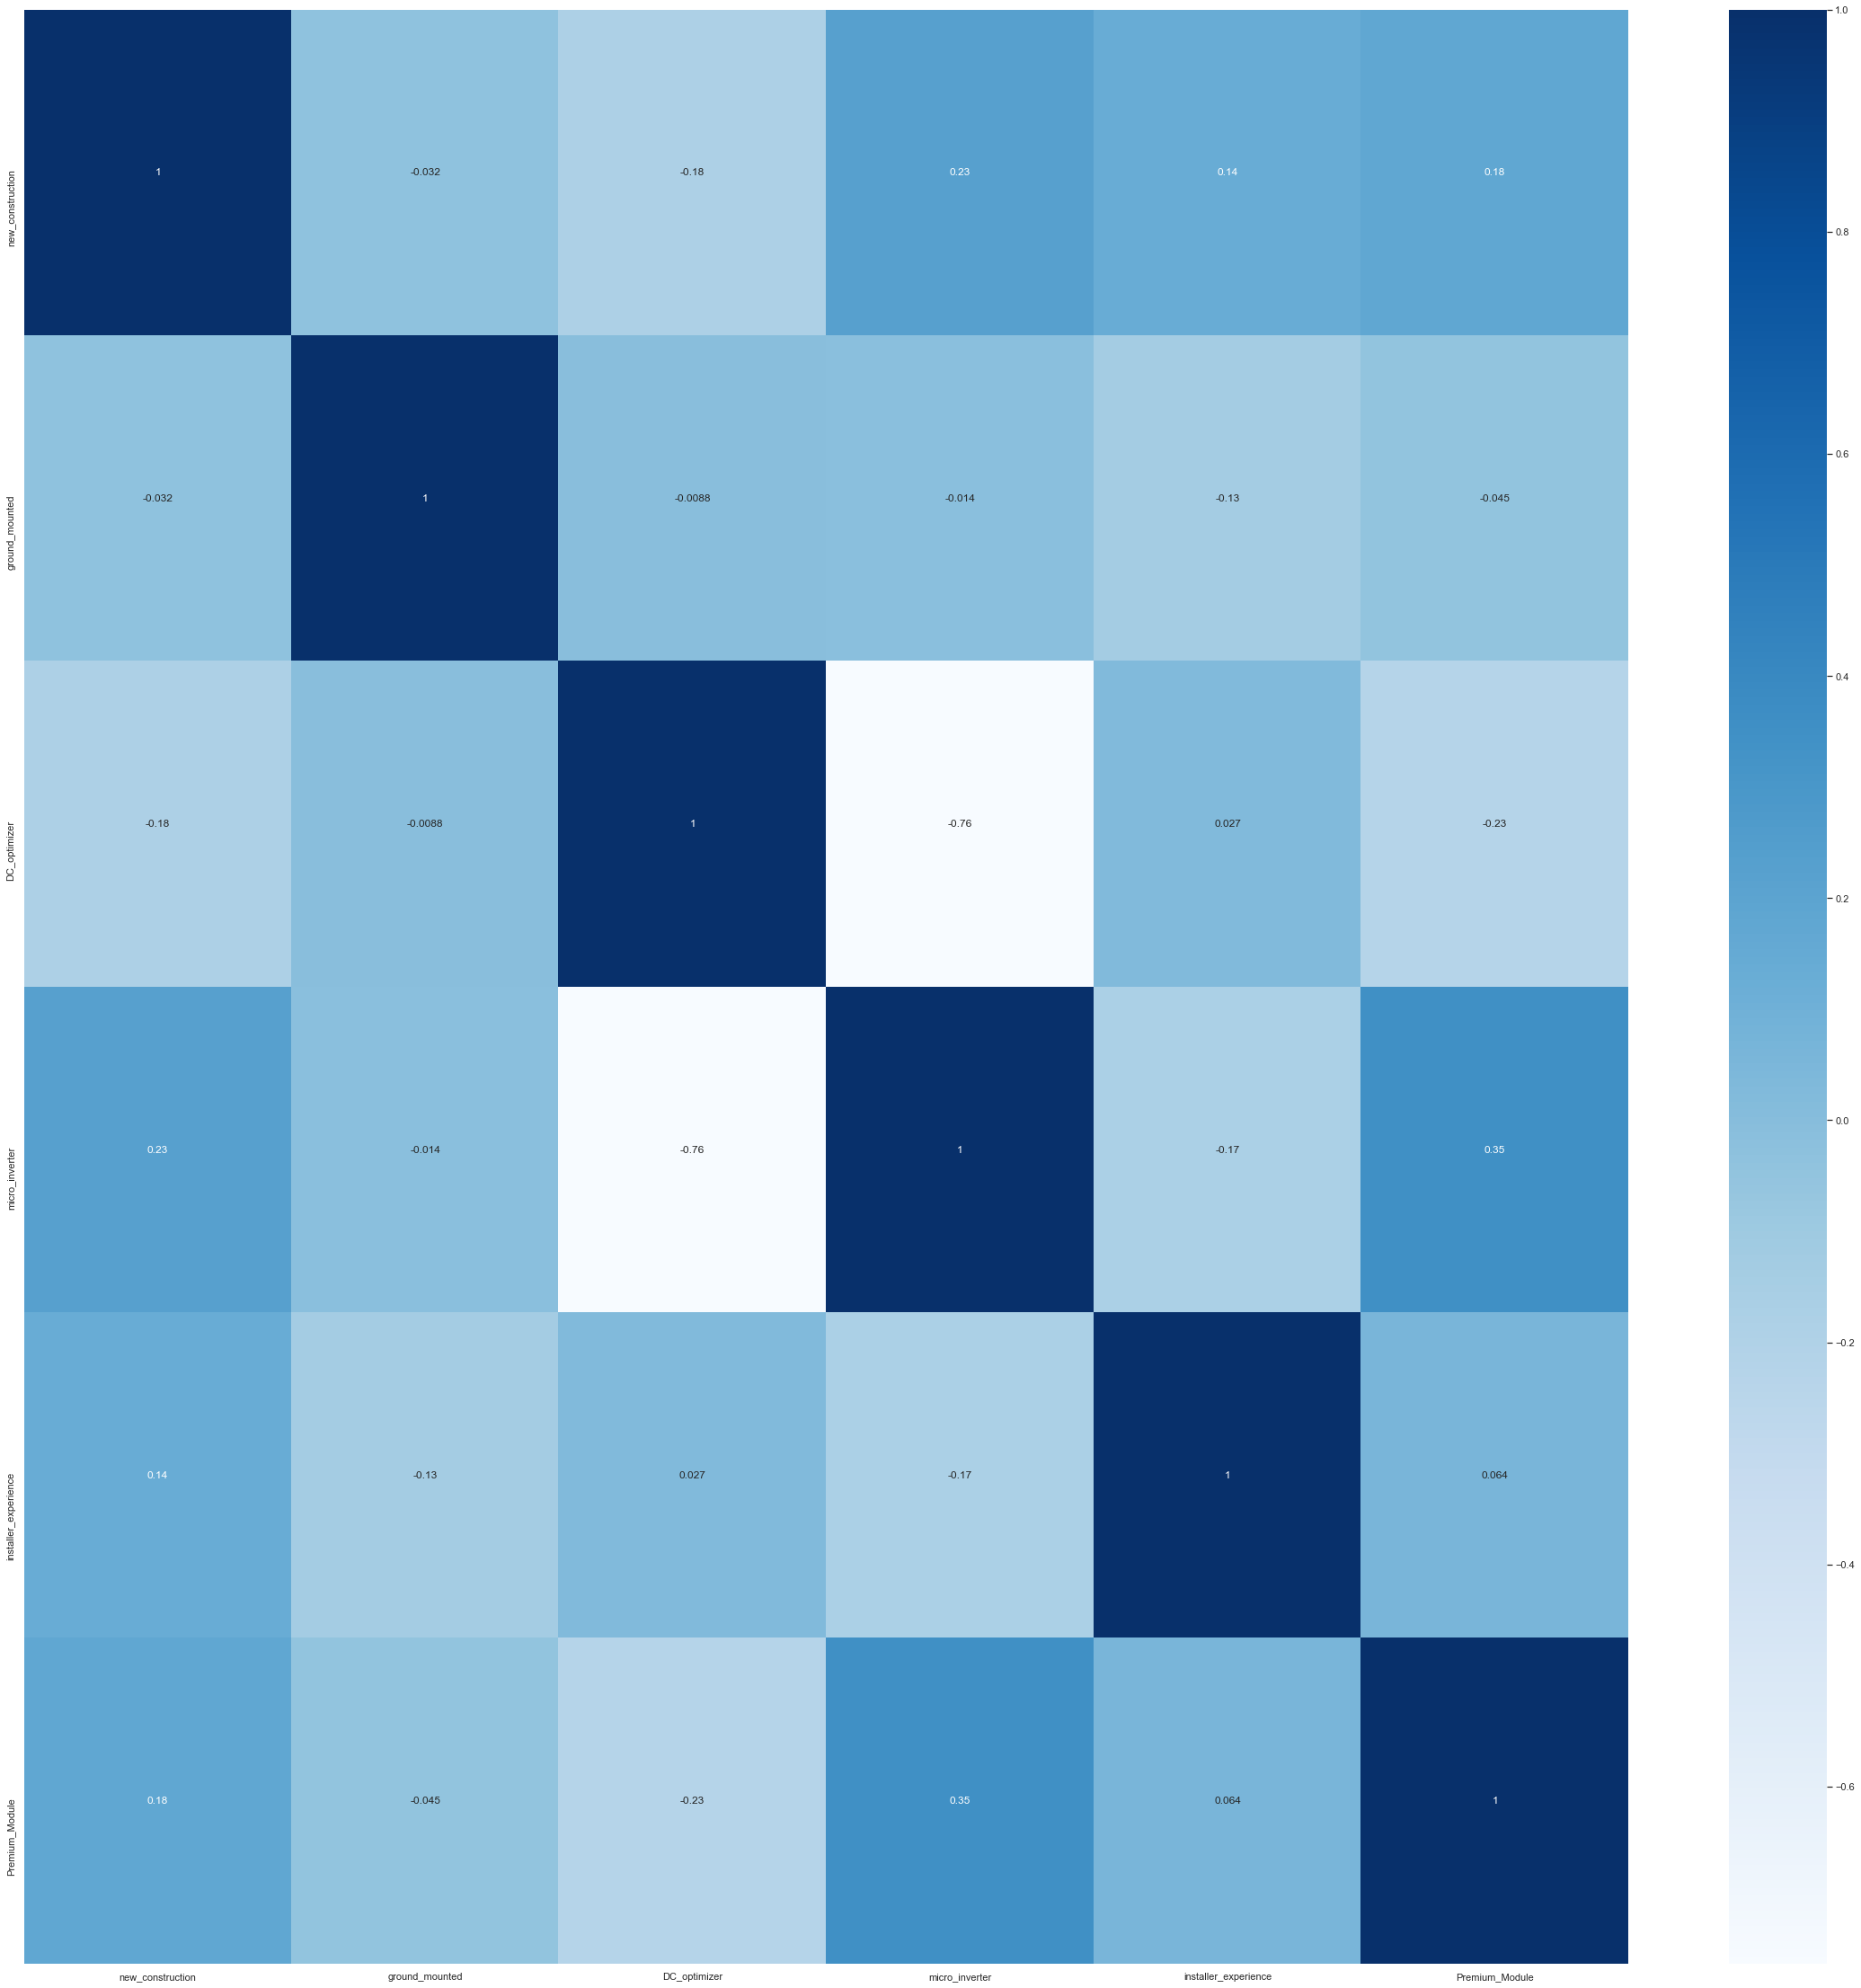

In [276]:
plt.figure(figsize = (40,40))
sns.heatmap(spearman_r, cmap = 'Blues', annot = True)

In [277]:
pv_reg.corr()

,Year,system_size_DC,new_construction,ground_mounted,DC_optimizer,dollar_per_watt,Overall_Module_efficiency,micro_inverter,installer_experience,Premium_Module
Year,1.000000,-0.012126,-0.060250,-0.011788,0.024426,-0.026408,0.149561,0.037673,0.172516,0.112090
system_size_DC,-0.012126,1.000000,-0.116105,0.205023,0.021892,-0.132470,-0.015295,-0.090969,-0.100079,-0.012559
new_construction,-0.060250,-0.116105,1.000000,-0.032453,-0.176849,0.006626,0.082334,0.226159,0.075028,0.179490
ground_mounted,-0.011788,0.205023,-0.032453,1.000000,-0.008828,-0.007274,-0.071659,-0.013697,-0.078899,-0.045036
DC_optimizer,0.024426,0.021892,-0.176849,-0.008828,1.000000,-0.010473,-0.189359,-0.759753,-0.049934,-0.225760
dollar_per_watt,-0.026408,-0.132470,0.006626,-0.007274,-0.010473,1.000000,-0.025040,-0.024290,0.114899,-0.030378
Overall_Module_efficiency,0.149561,-0.015295,0.082334,-0.071659,-0.189359,-0.025040,1.000000,0.289453,0.022827,0.749688
micro_inverter,0.037673,-0.090969,0.226159,-0.013697,-0.759753,-0.024290,0.289453,1.000000,-0.201879,0.348487
installer_experience,0.172516,-0.100079,0.075028,-0.078899,-0.049934,0.114899,0.022827,-0.201879,1.000000,-0.051587
Premium_Module,0.112090,-0.012559,0.179490,-0.045036,-0.225760,-0.030378,0.749688,0.348487,-0.051587,1.000000


In [278]:
pv_reg.to_csv('pv_regression.csv')

In [279]:
!ls

2021_Gaz_zcta_national.txt
2021_Gaz_zcta_national.zip
Capstone2_Data_Wrangling.ipynb
Capstone2_Data_Wrangling_Main copy.ipynb
Capstone2_Data_Wrangling_rev1.ipynb
Capstone2_EDA_regression_analysis.ipynb
library
pv1_data_cleaned.csv
pv_regression.csv


# Summary

To summarize :
- The EDA explores the relationships between the different features. 

- As we mentioned in the previous report that we will focus on predicting the costs of PV installations for host owned systems. In this section we refined our problem statement by focusing on predicting system installation costs for only residential systems. Additionally since data from recent years is more relavant than data from previous years, we focused on systems installed only during 2018 and 2019. 

- We start off by selecting the target variable or dependent variable that is the price of dollar per watt of a PV installation. 

- We then explore the relations between different features over time and the variation of the price per watt over time. We do this by using visual exploration techniques - histograms, bar plots, line plots and correlation heatmaps. 

- As we visaulize different plots, we decide which features to select and which to drop. We replace the various dummy variables relating to type of modules such as 'Mono', 'Poly', or the type of cosntruction of the module whether - bificial or BIPV modules with the overall module efficiencies. Modules with efficiencies greater than 20% are considered premium modules. While premium modules cost more to manufacture, their performance benefits offset the costs and that tends to drop the costs.  

- We note that over time the price of a PV installation falls with improvement in module efficiencies, increased adoption of DC optimizers and Micro-inverters. Larger systems tend to have lower prices. 

- Installer experience on the other hand tends to increase the cost. More experience installers tend to charge a premium for their services. 

- Ground mounted systems tend to reduce the price despite the fact that they have higher initial costs, implying that higher initial costs are offset by better performance gains. 

- We finally make sure the data is ready for regression analysis. We do this by making sure there is no invalid data in the data set. If a value of any feature can be imputed we substitute the NaN values with the imputed values. If the value can not be assumed or calculated, we drop that column or the corresponding row altogether. 

- A subsequent correlation analysis confirms these visualizations. A heat map shows different correlation strengths between different features. 

- As a last step we save the pv_reg dataset as a csv to carry out a regression analysis. Developing a regression model enables us to predict a dollar_per_watt cost in the future. 

 
 
 
